# Project : Real estate market in Bangladesh (exploratory analysis)

<span id="toc"></span>

## Table of Contents

1. [Introduction](#intro)
1. [Preliminary Data Wrangling](#wrangling)
1. [Exploratory Data Analysis](#eda)
1. [Conclusions](#conclusion)

[TOC](#toc)

## Introduction
We are going to investigate scrapped properties datasets in order to gain insights on Bangladesh's real estate market. The goal is to build an intuition on the collected data, and prepare a foundation for our model building stage. In particular, we will be interested in the following questions:
1. [Distribution of properties per city](#properties-vs-cities) (Interpretation [here](#properties-vs-cities-interpretation)) (Group 04)
1. [Distribution of properties per type (shop, apartment, ...)](#properties-vs-types) (Interpretation [here](#properties-vs-types-interpretation)) (Group 04)
1. [Distribution of properties per nature (residential, commercial)](#properties-vs-natures) (Interpretation [here](#properties-vs-natures-interpretation))
1. [Distribution of property price per type (shop, apartment, ...)](#prices-vs-types) (Interpretation [here](#prices-vs-types-interpretation)) (Group 04)
1. [Distribution of property price per nature (residential, commercial)](#prices-vs-natures) (Interpretation [here](#prices-vs-natures-interpretation)) (Group 04)
1. [Impact of basic facilities (e.g. number of bathrooms or bedrooms) on the prices](#basic-facilities--vs--prices) (Interpretation [here](#basic-facilities--vs--prices--interpretation)) (Group 02)
1. [Impact of facilities (malls, educational institutions, ...) in the vicinity on the prices](#facilities-vs-prices) (Group 02)
1. [Impact of internal amenities (play area, number of car parks, ...) on the prices](#amenities-vs-prices) (Interpretation [here](#amenities-vs-prices--interpretation)) (Group 02)
1. [Is it worth it to be interested in building types (shop, apartment, ...), or is building nature enough to explain the prices ?](#types-vs-prices-worth) (Interpretation [here](#types-vs-prices-worth--interpretation)) (Group 02)
1. [How do property prices fluctuate for same location?](#prices-vs-locations) (Interpretation [here](#prices-vs-locations--interpretation) ) (Group 03)
1. [How do property prices fluctuate for same property size?](#prices--vs--properties-size) (Interpretation [here](#prices--vs--properties-size--interpretation)) (Group 03)
1. [How do property prices fluctuate for same / similar amenities?](#prices-vs-amenities) (Interpretation [here](#prices-vs-amenities-interpretation)) (Group 03)
1. [Which amenities are the more frequent in Residential properties ?](#amenities--vs--residential-properties) (Interpretation [here](#amenities--vs--residential-properties-interpretation)) (Group 03)
1. [Which amenities are the more frequent in Commercial properties ?](#amenities--vs--commercial-properties) (Interpretation [here](#amenities--vs--commercial-properties-interpretation)) (Group 03)
1. [How does the available properties density vary across the country ?](#property-density-variation) (Interpretation [here](#property-density-variation-interpretation)) (Group 05)
1. [How does the density of available properties influence the price?](#property-density-variation--vs--price-variation) (Interpretation [here](#property-density-variation--vs--price-variation--interpretation)) (Group 5)
1. [Outliers analysis: What are the outliers and how infomative are they?](#outlier-analysis) (Interpretation [here](#outlier-analysis-interpretation)) (Group 02)
1. [Distribution of properties per division](#properties-vs-divisions) (Interpretation [here](#properties-vs-divisions-interpretation))



1. [How are the amenities distributed over locations ?](#yyyy) (pending analysis)
1. [Distribution of properties per zone](#xxx) (pending analysis)



> **Report date : May, 2023**     
> **Created by : `Task 03 - EDA`'s Collaborators and (co-)leads**


In [19]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from typing import List, Tuple

%matplotlib inline

<span id="wrangling"></span>
[TOC](#toc)  

## Preliminary Data Wrangling
        

### General Properties                
Our main data come from over 20+ different real estate website (in Bangladesh) which were scrapped. After cleaning and merging them, we were left with 33701 samples for 22 attributes.

Let's load the dataset.

In [21]:
# CSVs folder
merged_data_folder="../../data/Merged_Data"

# Export folder
exported_img_folder="exported/images"

In [23]:
# Load the merged dataset
df = pd.read_csv(f"{merged_data_folder}/cleaned_merged_datasets.csv")
df.head(2).T

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1
area,1185.0,2464.0
building_type,Apartment,Apartment
building_nature,Residential,Residential
image_url,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...
num_bath_rooms,0.0,4.0
num_bed_rooms,3.0,3.0
price,6100000.0,28900000.0
property_description,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,A Vibrant 2464 Sq Ft Residential Flat For Sale...
property_overview,This flat consists of facilities you can think...,Ready to move in somewhere with everything nea...
property_url,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...


In [24]:
df.shape

(33701, 24)

### Structure of the dataset
We have 22 features, which are:
* **area**: the area occupied by the property, in sqft
* **building_type**: the type of the property (shop, apartment, duplex, ...)
* **building_nature**: the nature of the property (residential, commercial)
* **image_url**: the link toward the property's image

TODO: add the other features.

In [25]:
# Structure of the properties dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [26]:
# Check N/A values count for each feature
df.isna().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [27]:
# Check null values count for each feature
df.isnull().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

N/A check and null check are giving the same result, so there is nothing to worry about there underlying content. As for the missing values, we should not worry about them since we don't need them in our EDA.

### Data assessement and cleaning

One thing to take note of is that this dataset has already been cleaned (in Task 02). So we will skip this section.

<span id="eda"></span>

[TOC](#toc)               
## Exploratory Data Analysis

<span id="properties-vs-cities"></span>

[EDA](#eda)  
### 1. Distribution of properties per city 
The goal is to know which cities we can make prediction for, as well as understand the how properties are distributed over those cities.      
This question was explored by Group 04.

In [28]:
# Number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Bogura                  8
Thakurgaon              8
Mymensingh              8
Cumilla                 5
Narsingdi               4
Magura                  4
Chittagong              4
Manikganj               4
Barguna                 4
Chandpur                3
Jashore                 3
Kushtia                 3
Moulvibazar             2
Nilphamari              2
Madaripur               2
Noakhali                2
Brahmanbaria            2
Tangail                 2
Naogaon                 1
Sirajganj               1
Lakshmipur              1
Sherpur                 1
Gaibandha               1
Gopalganj               1
Nawabganj               1
Bandarban               1
Habiganj                1
Kishoreganj 

Let's plot the result in order to read it better.

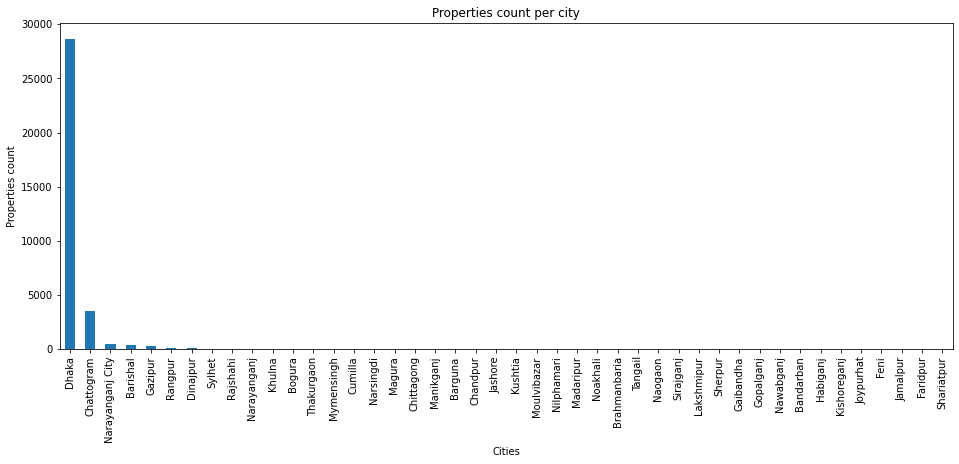

In [29]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

Let's improve the above plot to make it easier to read.

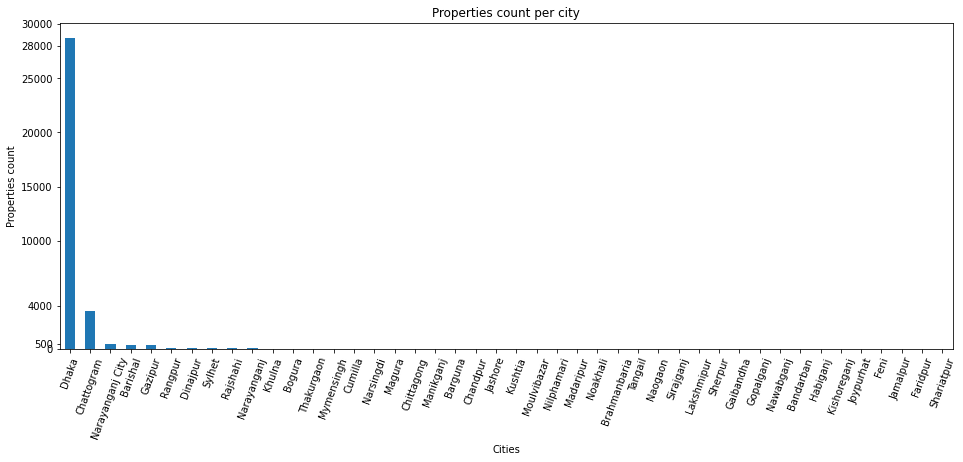

In [30]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 500, 4000, 10000, 15000, 20000, 25000, 28000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}

plt.xticks(rotation=70)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

<span id="properties-vs-cities-interpretation"></span>

1. Most of our properties are in `Dhaka`, for a total of nearly 28,000 properties. We also have nearly 4000 properties in `Chattogram`.     
1. A negligible amount of properties are in `Narayanganj City`, `Barishal`, `Gazipur`, each of them with a count below 500 properties ..
1. As for the other cities, their properties count is too insignificant.

<br/>

❗ **Recommendation**:
* We are expecting our future models not to be perform well on cities mentioned in (2). We should consider dropping samples with those cities when building models since their low number will make it so that the models will not predict well on them. 
* Cities not part of (1) and (2) should definitively be dropped in order to avoid noise in our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="properties-vs-types"></span>

[EDA](#eda)  
### 2. Distribution of properties per type 
We want to understand how properties are ditributed over the different types, namely shop, apartment, building, ...    
This question was explored by Group 04.

Below are the list of the different types of property with have.

In [31]:
# List of properties types
df["building_type"].unique()

array(['Apartment', 'Shop', 'Floor', 'Office', 'Building',
       'Residential Plot', 'Duplex', 'Commercial Plot', 'Warehouse',
       'Factory', 'House', 'Others'], dtype=object)

In [32]:
# Number of properties per type
properties_per_type_count = df["building_type"].value_counts()
properties_per_type_count

Apartment           26940
Office               2266
Building             1412
Shop                  956
Floor                 880
Residential Plot      875
House                 175
Duplex                 84
Commercial Plot        54
Warehouse              29
Factory                19
Others                 11
Name: building_type, dtype: int64

Let's plot the result.

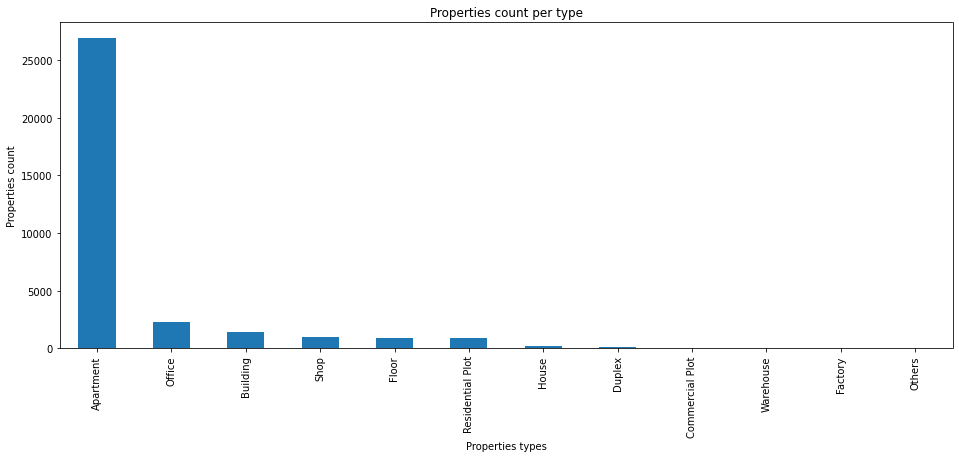

In [33]:
# Plotting the number of properties per type
properties_per_type_count.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Properties count")
plt.title("Properties count per type");

Let's improve the above plot to make it easier to read.

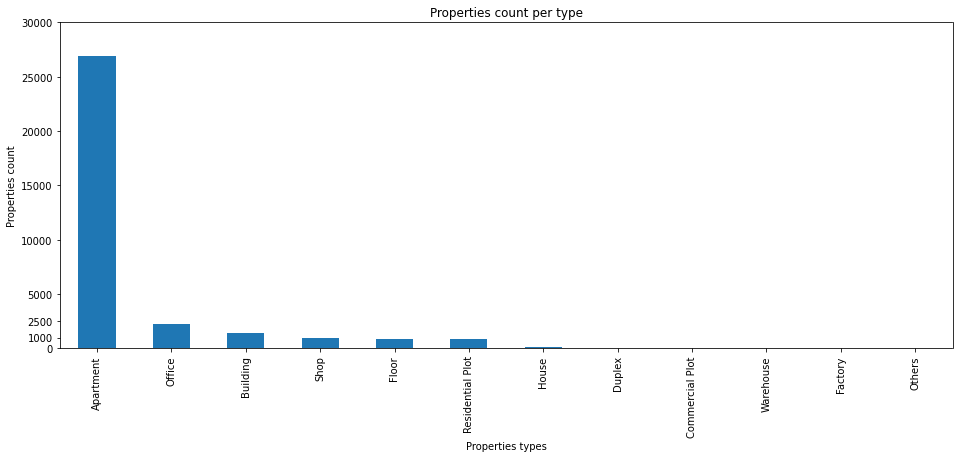

In [34]:
# Plotting the number of properties per type
properties_per_type_count.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 1000, 2500, 5000, 10000, 15000, 20000, 25000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Properties types")
plt.ylabel("Properties count")
plt.title("Properties count per type");

Now let's explore the proportion of the property's types in our dataset.

In [35]:
df.shape

(33701, 24)

In [36]:
# Proportion of each type of property
properties_per_type_prop = properties_per_type_count/df.shape[0]*100
properties_per_type_prop

Apartment           79.938281
Office               6.723836
Building             4.189787
Shop                 2.836711
Floor                2.611198
Residential Plot     2.596362
House                0.519272
Duplex               0.249251
Commercial Plot      0.160233
Warehouse            0.086051
Factory              0.056378
Others               0.032640
Name: building_type, dtype: float64

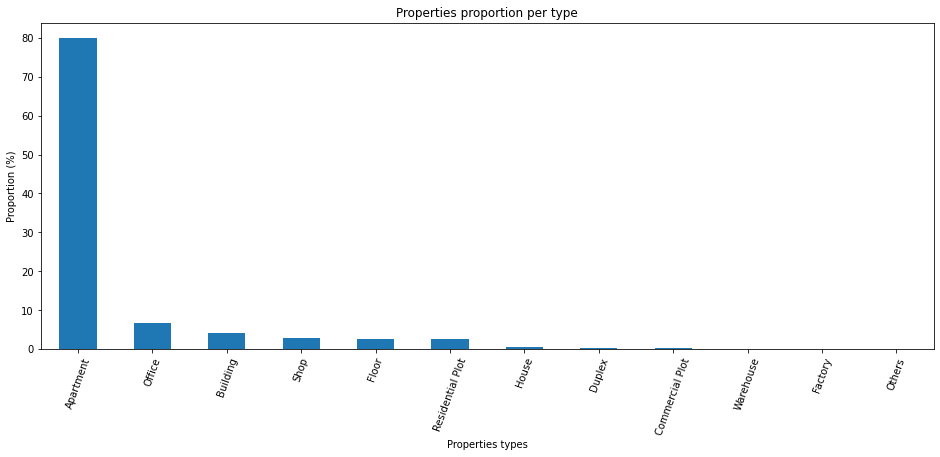

In [37]:
# Plotting the proportion of each type of property
properties_per_type_prop.plot(kind="bar", figsize=(16,6))

plt.xticks(rotation=70)

plt.xlabel("Properties types")
plt.ylabel("Proportion (%)")
plt.title("Properties proportion per type");

*Note: I didn't use a piechart because the number of elements (property types) is more than 04*

<span id="properties-vs-types-interpretation"></span>

1. Nearly 80% of our properties are `Apartment`, for a total of nearly 27000 samples. We also have some `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`, whose number are under 10% of the total dataset; that is to say, their numbers are under 2500. 
1. There are other types of properties, in a very negligible number.


<br/>

❗ **Recommendation**:
* We are expecting our future models to perform well on `Apartment`, and to have and acceptable result for `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`. They are expected to perform poorly on other types of properties.
* Types not part of (1) should be dropped in order to avoid noise in our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="properties-vs-natures"></span>

[EDA](#eda)  
### 3. Distribution of properties per nature 
We want to understand how properties are ditributed over their natures (Residential, Commercial).    


In [38]:
# Number of properties per nature
properties_per_nature_count = df["building_nature"].value_counts()
properties_per_nature_count

Residential    27220
Commercial      6481
Name: building_nature, dtype: int64

Let's plot the result.

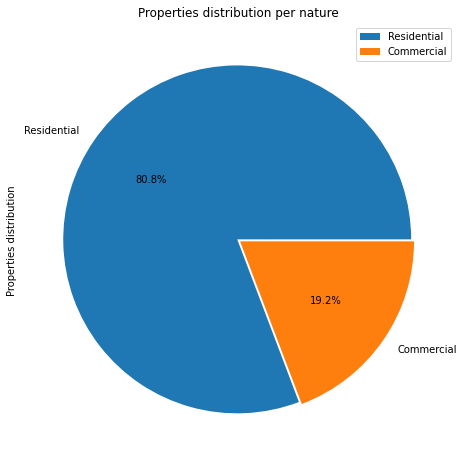

In [39]:
# Plotting the number of properties per nature
properties_per_nature_count.plot(kind="pie",
                                 figsize=(8,8),
                                 autopct='%1.1f%%',
                                 explode=[0.01, 0.01],
                                 legend=True
                                )

# plt.xlabel("Properties natures")
plt.ylabel("Properties distribution")
plt.title("Properties distribution per nature");

<span id="properties-vs-natures-interpretation"></span>

81% of our properties are `Residential`, while the rest are `Commercial`.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-types"></span>

[EDA](#eda)  
### 4. Distribution of property prices per type 
We want to know the prices are distributed over the different types of properties (shop, apartment, ...).    
This question was explored by Group 04.


In [40]:
# Mean price per building type
mean_price_per_type = df[ ["building_type","purpose","price"] ].groupby(["building_type","purpose"], as_index=False) \
                                                               .mean()

# Giving more relevant name to column
mean_price_per_type.rename(columns={
    "price":"mean_price"
}, inplace=True)
    
mean_price_per_type

,building_type,purpose,mean_price
0,Apartment,Rent,6.466751e+06
1,Apartment,Sale,2.671628e+09
2,Building,Rent,8.760356e+07
3,Building,Sale,7.466818e+07
4,Commercial Plot,Rent,2.253519e+05
5,Commercial Plot,Sale,8.602407e+07
6,Duplex,Rent,2.824167e+05
7,Duplex,Sale,4.528889e+07
8,Factory,Rent,3.767947e+05
9,Floor,Rent,4.798500e+05


In [41]:
# Separating the dataframe mean prices according to purpose
mean_price_per_type__rent= mean_price_per_type[mean_price_per_type["purpose"]=="Rent"]
mean_price_per_type__sale= mean_price_per_type[mean_price_per_type["purpose"]=="Sale"]

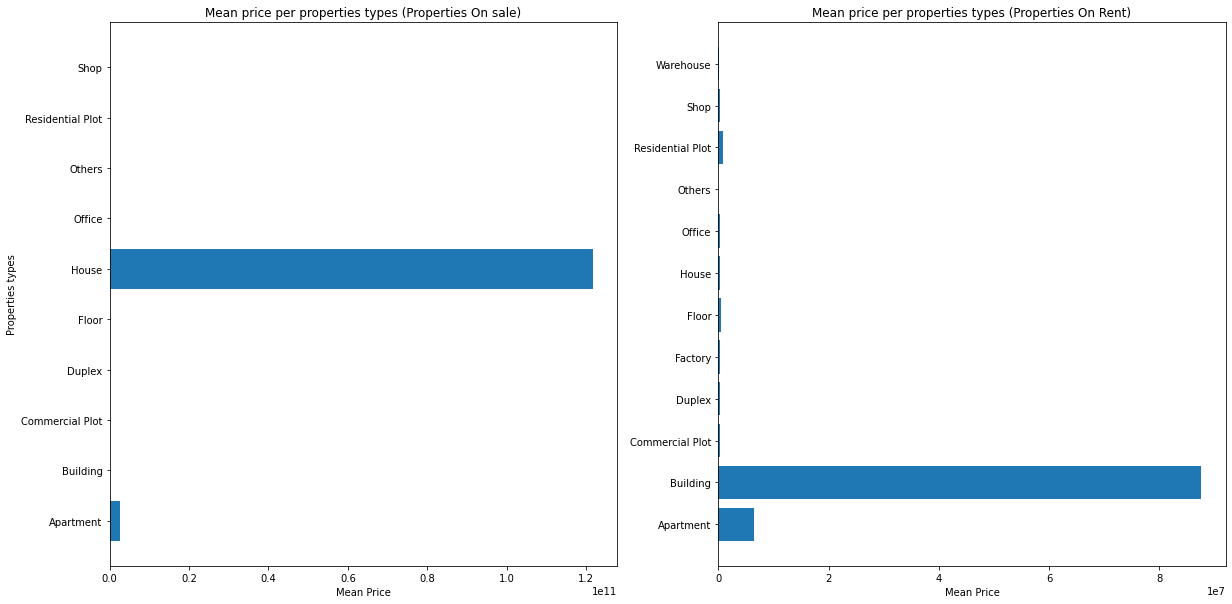

In [42]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_type__sale["mean_price"],y=mean_price_per_type__sale["building_type"])
# ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties types (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties types")



ax[1].barh(width=mean_price_per_type__rent["mean_price"],y=mean_price_per_type__rent["building_type"])
# ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties types (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

The above plot is not easily readable. Let's try to improve it by using a log scale on the x-axis

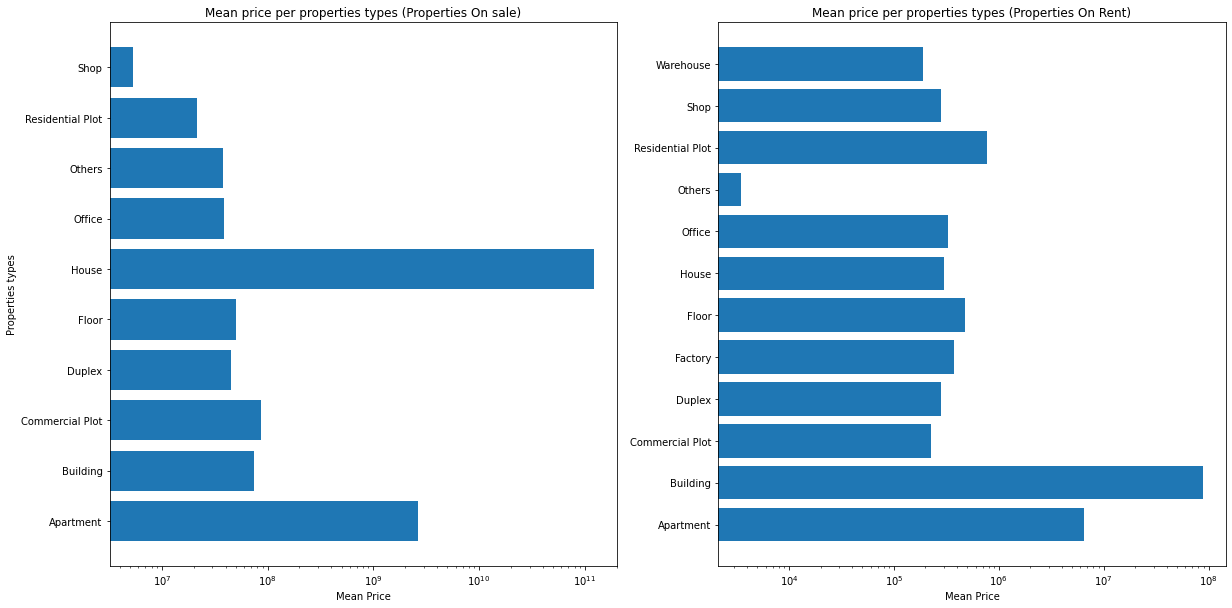

In [43]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_type__sale["mean_price"],y=mean_price_per_type__sale["building_type"])
ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties types (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties types")


ax[1].barh(width=mean_price_per_type__rent["mean_price"],y=mean_price_per_type__rent["building_type"])
ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties types (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

<span id="prices-vs-types-interpretation"></span>

Please take note of the fact that the prices are not on the same scale over the two plots.

`House` and `Apartment` on sale are very expensive compared to other types on sale. The `Shop` is the cheapet of all. Other property types on sale tend to have nearly the same prices.


`Building` and `Apartment` on rent are the most expensive types of property. `Residential plot` is third in line in term of price. As for the other types of property, their rent prices are nearly the same.

<!-- * For sales:
    * House tend to have higher sale prices, while apartment mean sale price tend to be 60% of house mean sale price
    * Other types of properties sale prices tend to not be for off from each other. Let us take note of Building and Commercial Plot mean prices that are close to each other, which are closely followed by the mean prices of Office, Floor, Duplex. The exception is the Shops, their sale price tend to be the lowest of all properties usual sale prices.
* For rents:
    * Building tend to rented at a higher price than other types of properties, closely followed by Apartment then Residential Plot. Other types of properties tend to have rent prices not far from each other. Let us take note of the fact that there are a type of properties named `Others`, and that they have the lowest mean rent prices. -->
    

**TODO** : 
- Provide an interpretation for the above plots.
- Try to make the same plot after dividing the prices by 10.000 (price will thus be in thousand)
- Use the same bins on the x-axis of the two plots (mandatory)
- Define order of the values on the y-axis (to make sure that each value is at the same position on the two plots) (mandatory)
- Make sure that each property type is on the y-axis, with a value of zero if necessary (mandatory)
<br/>



<span id="prices-vs-natures"></span>

[EDA](#eda)  
### 5. Distribution of property prices per nature
The goal is to understand how the prices differentiate between `Commercial` and `Residential` areas. For example, we want to know if Commercial properties generally have a higher prices compared to Residential properties, or if it is the other way around.          
This question was explored by Group 04.


In [44]:
# Mean price per building nature
mean_price_per_nature = df[ ["building_nature","purpose","price"] ].groupby(["building_nature","purpose"], as_index=False) \
                                                               .mean()

# Giving more relevant name to column
mean_price_per_nature.rename(columns={
    "price":"mean_price"
}, inplace=True)
    
mean_price_per_nature

,building_nature,purpose,mean_price
0,Commercial,Rent,2.015635e+07
1,Commercial,Sale,2.632762e+07
2,Residential,Rent,6.794873e+06
3,Residential,Sale,2.932132e+09


Let's observe the result on a plot.

In [45]:
# Separating the dataframe mean prices according to purpose
mean_price_per_nature__rent= mean_price_per_nature[mean_price_per_nature["purpose"]=="Rent"]
mean_price_per_nature__sale= mean_price_per_nature[mean_price_per_nature["purpose"]=="Sale"]

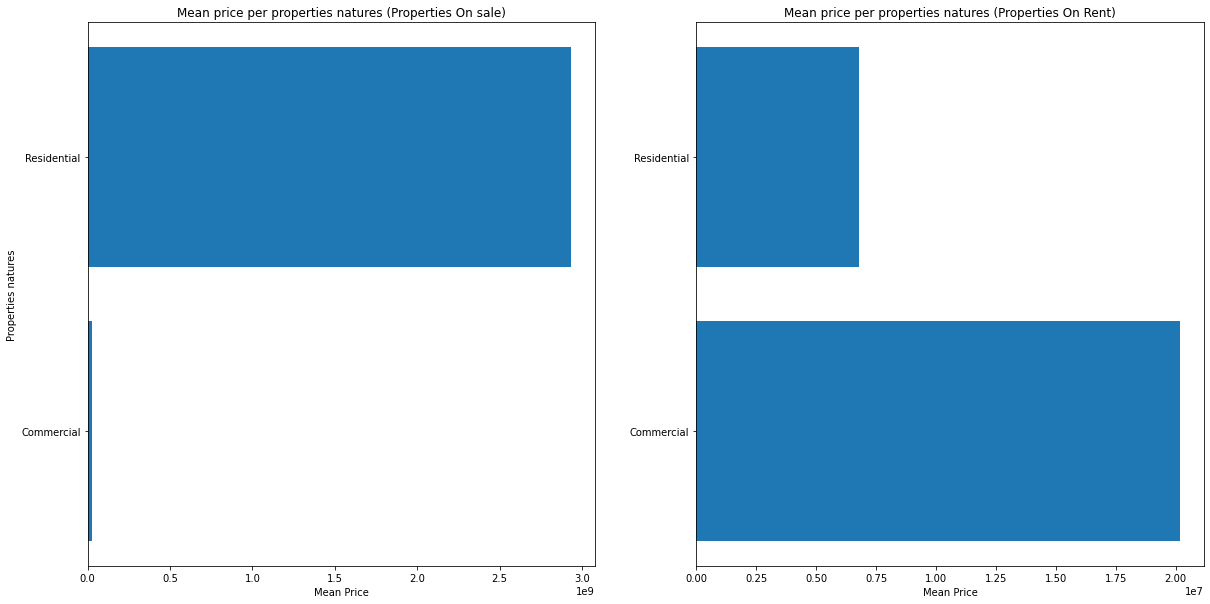

In [46]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_nature__sale["mean_price"],y=mean_price_per_nature__sale["building_nature"])
# ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties natures (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties natures")


ax[1].barh(width=mean_price_per_nature__rent["mean_price"],y=mean_price_per_nature__rent["building_nature"])
# ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties natures (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])

# plt.title("Mean price per properties natures")
plt.show()

Let's plot the above plot on a log scale

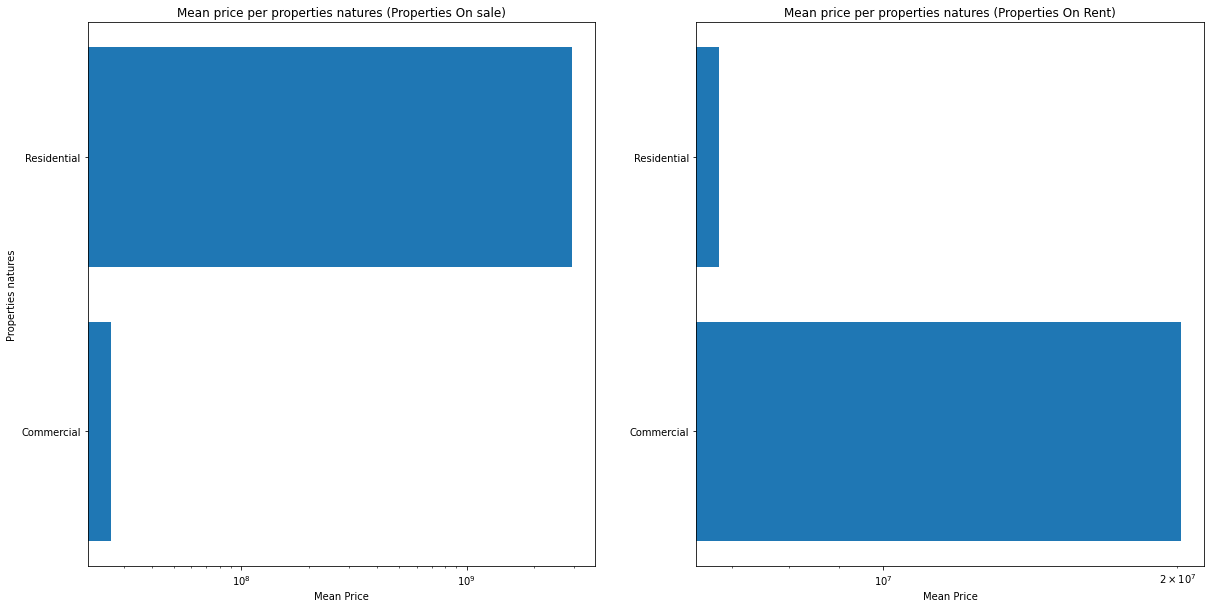

In [47]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_nature__sale["mean_price"],y=mean_price_per_nature__sale["building_nature"])
ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties natures (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties natures")


ax[1].barh(width=mean_price_per_nature__rent["mean_price"],y=mean_price_per_nature__rent["building_nature"])
ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties natures (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])

# plt.title("Mean price per properties natures")
plt.show()

<span id="properties-vs-natures-interpretation"></span>

* Residential properties on sale are much more expensive compared to Commercial properties on sale. We could try to understand why from industry experts.
* Rented Commercial properties tend to cost much more than rented Residential properties. It can be interesting to ask industry experts why.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

Let's us plot the prices distribution per purpose (Sale/ Rent).

##### Distribution of prices for properties to rent

In [48]:
# Get the rent prices
rent_prices = df[df["purpose"]=="Rent"]["price"]
rent_prices

18        500000.0
10855    1213000.0
10856     210000.0
10857     126000.0
10858     360000.0
           ...    
33696        110.0
33697        100.0
33698        120.0
33699        120.0
33700         70.0
Name: price, Length: 20723, dtype: float64

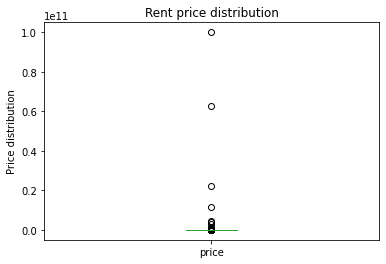

In [49]:
# Price distribution for Rent
rent_prices.plot(kind="box")

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

Let's zoom-in the relevant part of our x-axis.

In [50]:
# 0.2 * 1e11

In [51]:
rent_prices.describe()

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
max      1.000000e+11
Name: price, dtype: float64

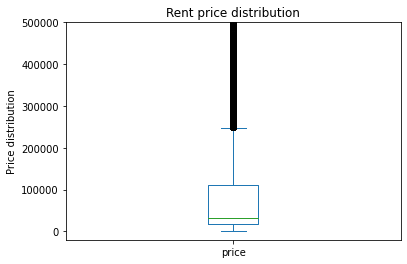

In [52]:
# Price distribution for Rent
rent_prices.plot(kind="box")

plt.ylim(-2*1e4, 0.5 * 1e6)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

We are going to update the y-ticks value in order to make the plot easier to read.

In [53]:
# Meadian price
rent_prices.median()

33000.0

In [54]:
# Min price
rent_prices.min()

0.0

In [55]:
# Mean price
rent_prices.min()

0.0

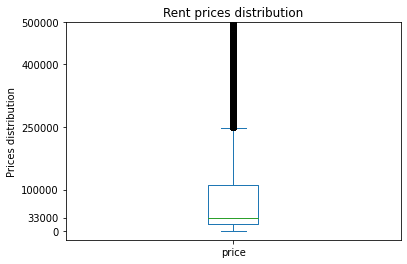

In [56]:
# Price distribution for Rent
rent_prices.plot(kind="box")

y_ticks = [0, 33000, 100000, 250000, 400000,500000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])

plt.ylim(-2*1e4, 0.5 * 1e6)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Prices distribution")
plt.title("Rent prices distribution");

Most rented properties tend to cost 33000 BTD. We can also see that the majority of rented properties cost between 33,000 and 100,000 BTD. Some rented properties have prices situated between 100,000 and 250,000 BTD.    
As for properties rented below 33,000 BTD, they are very few in number.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

##### Distribution of prices for properties to sale

In [57]:
# Get the sale prices
sale_prices = df[df["purpose"]=="Sale"]["price"]
sale_prices

0         6100000.0
1        28900000.0
2         7500000.0
3        20000000.0
4        10800000.0
            ...    
32300    12200000.0
32316     1300000.0
32317      140000.0
32319    11000000.0
32321      750000.0
Name: price, Length: 12978, dtype: float64

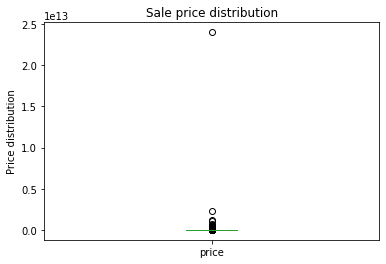

In [58]:
# Price distribution for Rent
sale_prices.plot(kind="box")

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

Let's zoom-in the relevant part of our x-axis.

In [59]:
sale_prices.describe()

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
max      2.400000e+13
Name: price, dtype: float64

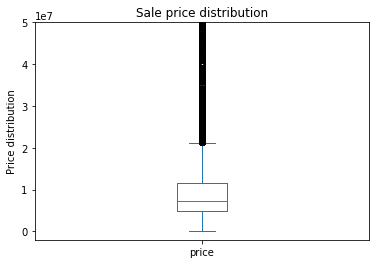

In [60]:
# Price distribution for Sale
sale_prices.plot(kind="box")

plt.ylim(-2*1e6, 0.5 * 1e8)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

Let's review the y-axis ticks to make the plot more informative.

In [61]:
2*1e7

20000000.0

In [62]:
sale_prices.describe()

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
max      2.400000e+13
Name: price, dtype: float64

In [63]:
5*1e6, 7.35*1e6, 1.15*1e7, 2.4*1e13,   

(5000000.0, 7350000.0, 11500000.0, 24000000000000.0)

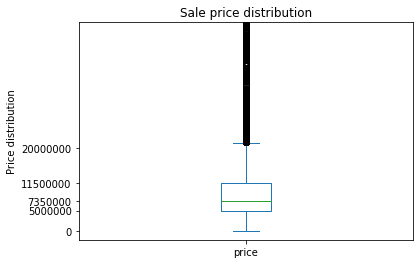

In [64]:
# Price distribution for Sale
sale_prices.plot(kind="box")

plt.ylim(-2*1e6, 0.5 * 1e8)

y_ticks = [0, 5000000, 7350000, 11500000,20000000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

* Most properties are sold at 7,350,000 BTD. 
* 02 third of the sale prices are comprised between 7,350,000 and 11,500,000 BTD.
* A third of the sold properties are between 5,000,000 and 7,350,000 BTD.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="basic-facilities--vs--prices"></span>

 
[EDA](#eda)  
### 6. Impact of basic facilities on the prices
We want to know how the basic facilities (e.g. number of baths/rooms, area) on impact the prices.

This question was explored by Group 02.


#### Impact of properties areas on the prices

In [65]:
# Distribution of prices for 'Rent'
percl_price_Rent = df[(df["purpose"] == "Rent")]["price"].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [66]:
# Distribution of prices for 'Sale'
percl_price_Sale = df[(df["purpose"] == "Sale")]["price"].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])
percl_price_Sale

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

In [67]:
# Distribution of area for 'Rent'
percl_area_Rent = df[(df["purpose"] == "Rent")]["area"].describe(percentiles=[0.05, .3, .6, .9, 0.95, .99])
percl_area_Rent

count    2.072300e+04
mean     4.241257e+03
std      1.555526e+05
min      0.000000e+00
5%       3.000000e+00
30%      1.000000e+03
50%      1.400000e+03
60%      1.650000e+03
90%      3.373000e+03
95%      5.000000e+03
99%      1.200000e+04
max      1.450147e+07
Name: area, dtype: float64

In [68]:
# Distribution of area for 'Sale'
percl_area_Sale = df[(df["purpose"] == "Sale")]["area"].describe(percentiles=[0.05, .3, .6, .9, 0.95, .99])
percl_area_Sale

count     12978.000000
mean       1664.862321
std        3755.222407
min           1.000000
5%          650.000000
30%        1150.000000
50%        1320.000000
60%        1445.000000
90%        2289.300000
95%        3600.000000
99%        7218.216000
max      296600.000000
Name: area, dtype: float64

Let's recall the proportion of each property type in the dataset.

In [69]:
# Proportion of each type of property (%)
properties_per_type_prop

Apartment           79.938281
Office               6.723836
Building             4.189787
Shop                 2.836711
Floor                2.611198
Residential Plot     2.596362
House                0.519272
Duplex               0.249251
Commercial Plot      0.160233
Warehouse            0.086051
Factory              0.056378
Others               0.032640
Name: building_type, dtype: float64

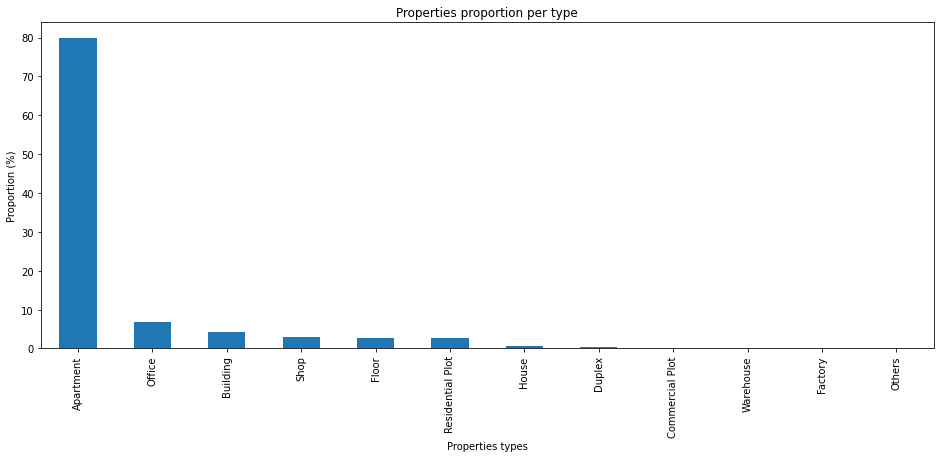

In [70]:
# Plotting the proportion of each type of property
properties_per_type_prop.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Proportion (%)")
plt.title("Properties proportion per type");

 Close to 80% of the properties are of type 'Apartment'

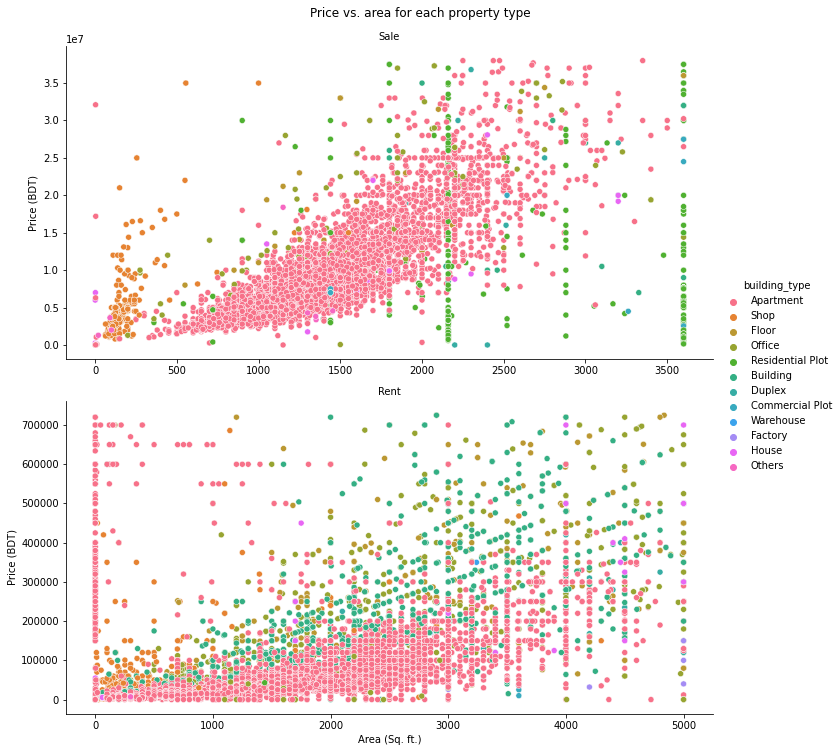

In [71]:
# Prepare / subset the data:
# Get all the data that has price and area outliers removed (= all values above 95 percentile)
data = df[((df.purpose == 'Rent') &
                  (df.area <= percl_area_Rent['95%']) & 
                  (df.price <= percl_price_Rent['95%'])
                 ) | 
                 ((df.purpose == 'Sale') & 
                  (df.area <= percl_area_Sale['95%']) & 
                  (df.price <= percl_price_Sale['95%'])
                 )
                 ]

g = sb.relplot(y="price", x="area", 
                data = data,
                row = "purpose",
                hue = "building_type",
#                 size = "num_bed_rooms",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=5, aspect=2
               )

g.set_titles('{row_name}', fontsize=24)
g.set_axis_labels('Area (Sq. ft.)', 'Price (BDT)')

# g.fig.suptitle('Price vs. area for each property type and purpose', fontsize=12, y=1.02)
g.fig.suptitle('Price vs. area for each property type', fontsize=12, y=1.02)
plt.plot()

# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price-vs-Area-Scatterplot.jpg")

We see that the influence of "area" (size in Sq. ft) on price is more straightforwardly visible for "Aparments" under "Sale" purpose such that there is a linear increase in price with increase in area. For "Aparments" under "Rent" the picture is not that clear--there doesn't seem to be a direct linear relationship. 

Note that Close to 80% of the properties are of type 'Apartment'. This possibly means that we have very little info about other property types.

Furthermore, the range of areas for each type of properties differ. We should take note of this for when we are going to build our future models, because it can means one of two things:
* It is possible that it can have a negative effect on the models performance.
* It is possible that it help the model predict prices better, since the property types seem to be correlated to the prices.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

#### Impact of properties number of bathrooms and number of bedrooms on the prices
We want to understand if (and how) the number of bathrooms and number of bedrooms impact the prices

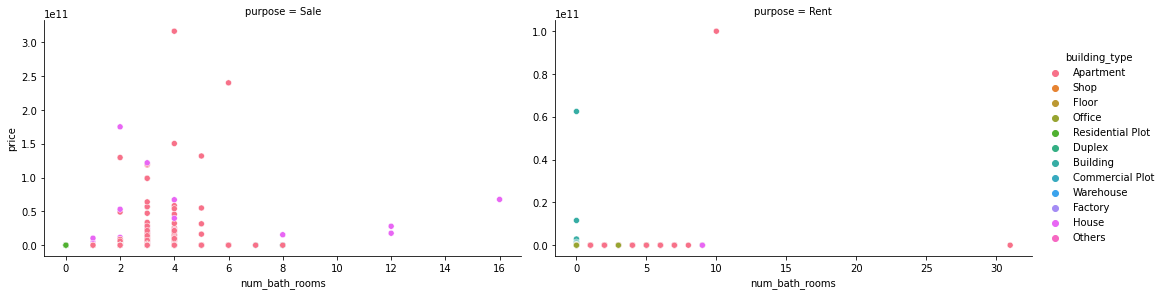

In [72]:
g = sb.relplot(y="price", x="num_bath_rooms", 
                data = df[(((df.purpose == 'Rent') & 
                                      (df.area <= percl_area_Rent['95%'])) | 
                                     ((df.purpose == 'Sale') & 
                                      (df.area <= percl_area_Sale['95%'])
                                     ))],
                col = "purpose",
                hue = "building_type",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=4, aspect=1.8
               )
# g.fig.set_size_inches(10, 10)
plt.plot();

The above plot is not very informative.

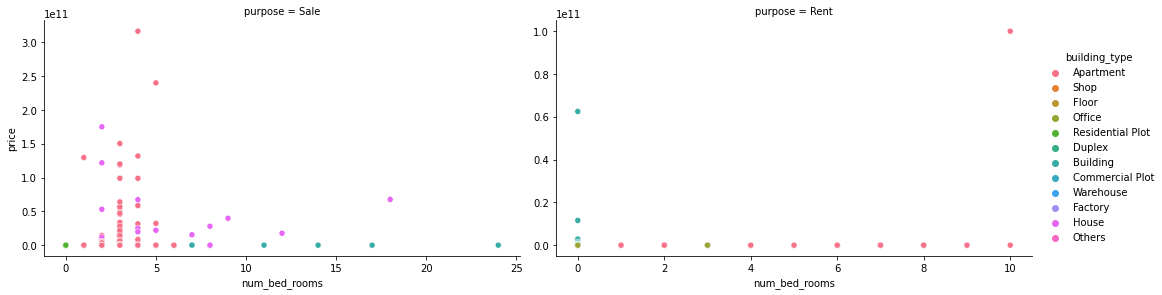

In [73]:
g = sb.relplot(y="price", x="num_bed_rooms", 
                data = df[(((df.purpose == 'Rent') & 
                                      (df.area <= percl_area_Rent['95%'])) | 
                                     ((df.purpose == 'Sale') & 
                                      (df.area <= percl_area_Sale['95%'])
                                     ))],
                col = "purpose",
                hue = "building_type",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=4, aspect=1.8
               )
# g.fig.set_size_inches(50, 5)
plt.plot();

The above plot is not very informative.

The individual scatterplots by properties types for "price vs bathrooms count" or "price vs bedrooms count" don't seem very informative, which is perfectly normal since the variable on the x-axis in the above two plots are discrete quantitative variable (not continuous quantitative variable). Boxplots should be more informative for us.

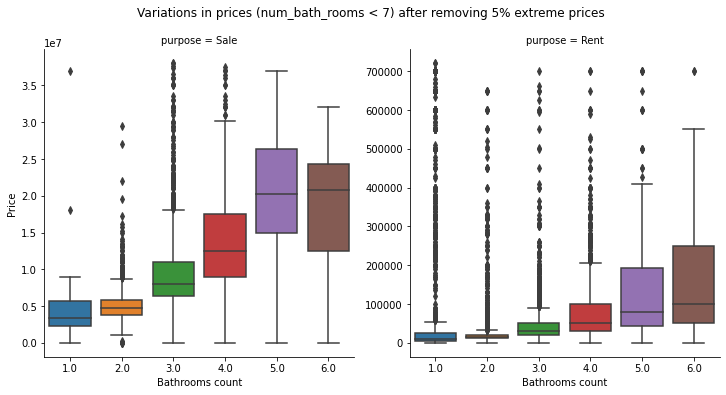

In [74]:
# Plotting the prices variations per number of bathrooms

# plt.figure(figsize=(12, 3))
g = sb.catplot(y="price", x="num_bath_rooms", 
            data = df[(((df.purpose == 'Rent') & 
                                  (df.price <= percl_price_Rent['95%'])
                                 ) |
                                 ((df.purpose == 'Sale') & 
                                  (df.price <= percl_price_Sale['95%'])
                                 )
                                ) &
                                (df.num_bath_rooms > 0) &
                                (df.num_bath_rooms <= 6)
                                   ], 
                kind="box",
               col= "purpose", 
               sharey = False
           )

g.set_axis_labels('Bathrooms count', 'Price')

# g.set_titles('{row_name}', fontsize=24)
# g.set_axis_labels('Bathrooms count', 'Price')

# Add row title
fig = g.fig
# fig.suptitle(f'Row: {row_var}', y=1.05)
fig.suptitle("Variations in prices (num_bath_rooms < 7) after removing 5% extreme prices", y=1.05)

plt.plot()


# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price--vs--bathrooms-count.jpg");

<span id="basic-facilities--vs--prices--interpretation"></span>

* Please note that the two charts are not on the same scale
* The number of bathrooms is an indicator of properties prices, either for sale or rent
* Properties with 01 and 02 bathrooms tend to have sale prices not far from each other, though their prices ranges are different
* Properties with 05 and 06 bathrooms are sold nearly at the same prices, though their prices ranges are different. Surprisingly, properties with 05 bathrooms have a range of prices superior to the range of prices for 06 bathrooms' properties


<br/>

💡 The above plot as well as its interpretation, will be put in our explanatory analysis (or in our presention).

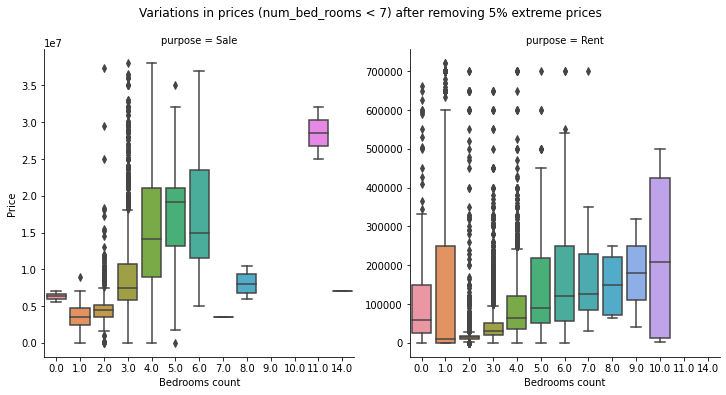

In [75]:
# Plotting the prices variations per number of bathrooms

# plt.figure(figsize=(12, 3))
g = sb.catplot(y="price", x="num_bed_rooms", 
            data = df[(((df.purpose == 'Rent') & 
                                  (df.price <= percl_price_Rent['95%'])
                                 ) |
                                 ((df.purpose == 'Sale') & 
                                  (df.price <= percl_price_Sale['95%'])
                                 )
                                ) &
                                (df.num_bath_rooms > 0) &
                                (df.num_bath_rooms <= 6)
                                   ], 
                kind="box",
               col= "purpose", 
               sharey = False
           )

g.set_axis_labels('Bedrooms count', 'Price')

# g.set_titles('{row_name}', fontsize=24)
# g.set_axis_labels('Bathrooms count', 'Price')

# Add row title
fig = g.fig
# fig.suptitle(f'Row: {row_var}', y=1.05)
fig.suptitle("Variations in prices (num_bed_rooms < 7) after removing 5% extreme prices", y=1.05)

plt.plot()


# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price--vs--bedrooms-count.jpg");

<span id="basic-facilities--vs--prices--interpretation"></span>

* Please note that the two charts are not on the same scale
* The number of bedrooms is also an indicator of properties prices, either for sale or rent
* Properties with 00 bedrooms should be Commercial. We can see that properties on sale with 00 bedroom are on a very small range of price, which mean that it should be easy for Commercial properties on rent to be quoted.
* Generally, the most bedrooms a (residential) proprety has, the higher its rent/sale price; that make sens since it should mean more area available in the property. The exception is the properties on sale with 06 bedrooms, which have a fall in mean price, though they have a chance to be quoted higher (their prices range is bigger).


<br/>

💡 The above plot as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="facilities-vs-prices"></span>
 
[EDA](#eda)  
### 7. Impact of facilities in the vicinity on the prices
This time, we want to understand how facilities in the vicinity, such malls or educational institutions, can impact the prices.     
This question was explored by Group 02.


This question cannot be answered because required infos about those facilities are not available in the dataset.

<span id="amenities-vs-prices"></span>
 
[EDA](#eda)  
### 8.Impact of internal amenities on the prices
We want to know how internal amenities (play area, number of car parks, ...) impact the price.     
This question was explored by Group 02.


We don't have separate info about the internal amenities; so let's plot the impact of all the amenities we have

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [77]:
amenities_vars =  ["relaxation_amenity_count","security_amenity_count","maintenance_or_cleaning_amenity_count",
                  "social_amenity_count","expendable_amenity_count","service_staff_amenity_count",
                   "unclassify_amenity_count"]
amenities_vars

['relaxation_amenity_count',
 'security_amenity_count',
 'maintenance_or_cleaning_amenity_count',
 'social_amenity_count',
 'expendable_amenity_count',
 'service_staff_amenity_count',
 'unclassify_amenity_count']

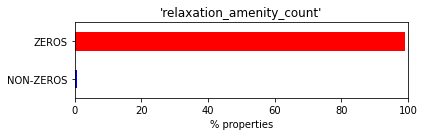

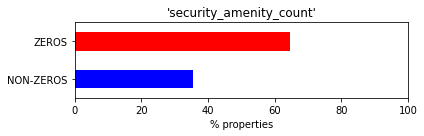

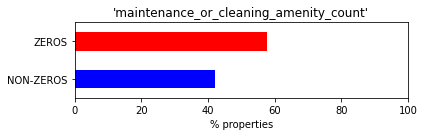

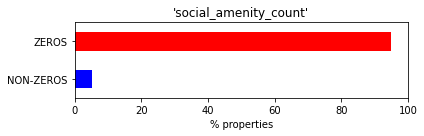

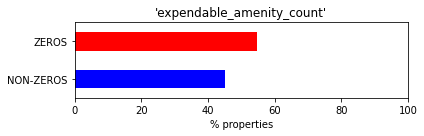

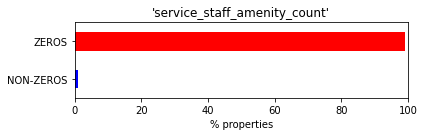

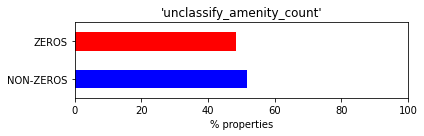

In [78]:
# Plotting how each amenity type variable is distributed over the dataset

for col_name in amenities_vars:
    # col_name = 'security_amenity_count'
    # print(df[col_name].value_counts())

    df_TMP = pd.Series(np.where(df[col_name] == 0, 'ZEROS', 'NON-ZEROS'))
    percentages = (df_TMP.value_counts() / df_TMP.value_counts().sum()) * 100
    
#     print()
#     print("------------------------------------")
#     print(percentages)

    fig, ax = plt.subplots(figsize=(6, 2))
    percentages.sort_index().plot.barh(color=['blue', 'red'])

    # Set x and y axis labels
    plt.xlabel('% properties')
    plt.ylabel('')
    # plt.title(f"'{col_name}': zero vs. non-zero entries")
    plt.title(f"'{col_name}'")
    ax.set_xlim(0, 100)

    plt.tight_layout()
    
#     plt.title("Amenity types variable distribution over the dataset")

    # Show the plot
    plt.show()


1. 04 amenity types have adequate data: security, maintenance or cleaning, expendable, unclassfied
1. 03 amenity types have very little data: relaxation, service staff, social

❗ **Recommendation**:
* We should consider dropping the amenities with very little data if they don't impact the prices that much.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

In [79]:
# Recall Price percentile range for 'Rent'
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [80]:
# Recall Price percentile range for 'Sale'
percl_price_Sale

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

Now we are going to plot the distribution of price over the count of each amenity type count.

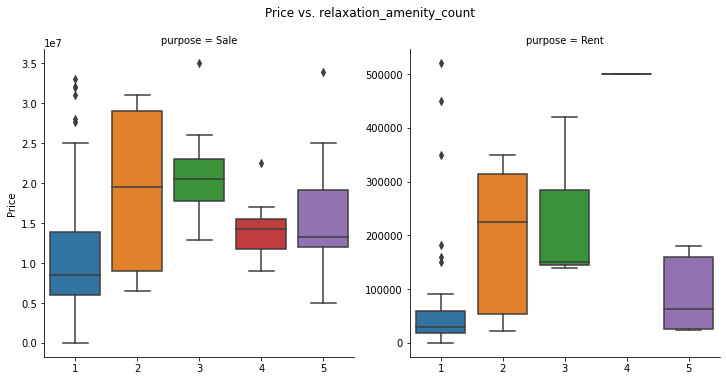

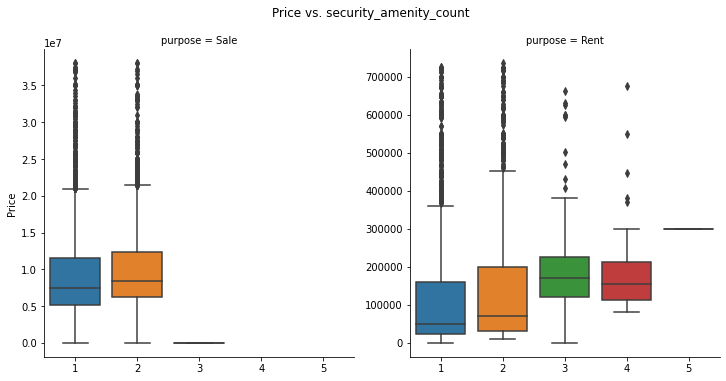

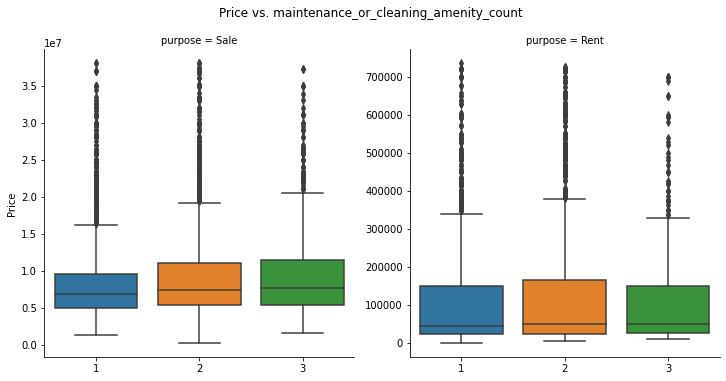

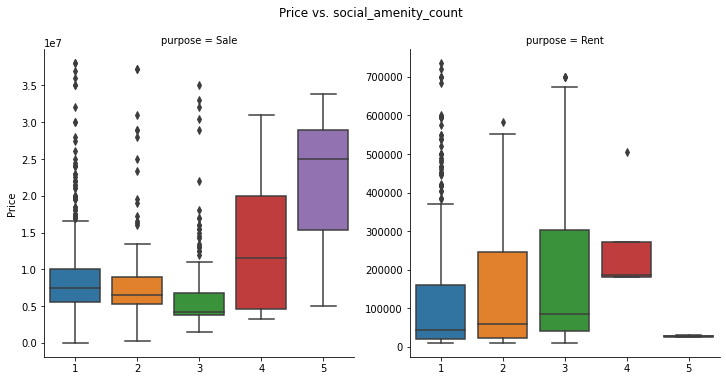

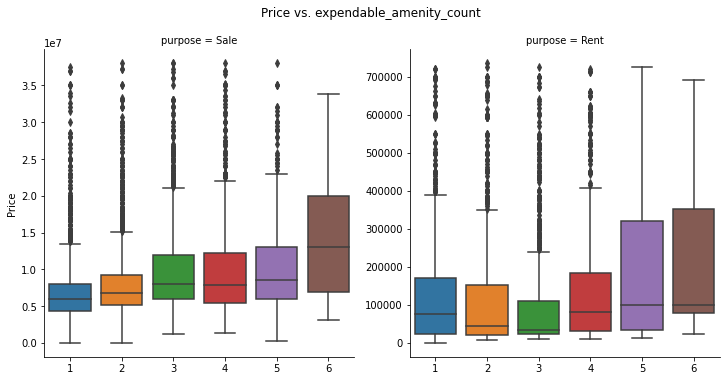

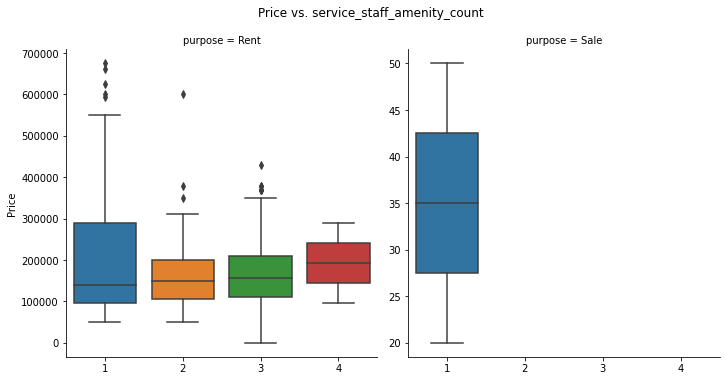

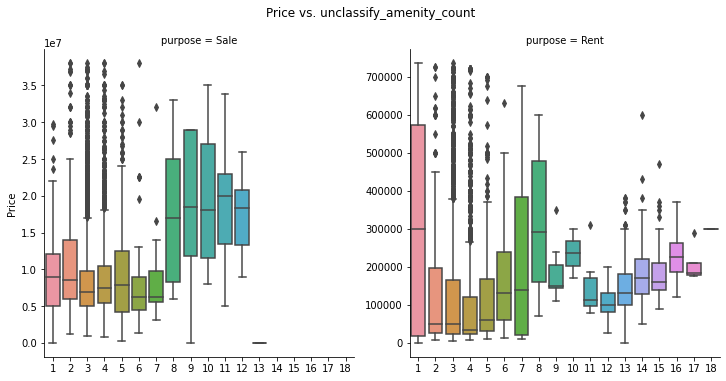

In [81]:
# Take a subset of data such that properties with very hight values (upper 5%tile) are excluded
df_sub = df[(((df.purpose == 'Rent') & (df.price <= percl_price_Rent['95%'])) | 
                    ((df.purpose == 'Sale') & (df.price <= percl_price_Sale['95%']))
                   )]

# Plotting the distribution of price over the count of each amenity type count
for amenity_name in amenities_vars:
    g = sb.catplot(y="price", 
                   x=amenity_name, #"security_amenity_count", 
                    data = df_sub[df_sub[amenity_name] > 0], 
                    kind="box",
                    col= "purpose", 
                    sharey = False
                   )

    g.set_axis_labels('', 'Price')
    # Exporting the plot image
    g.savefig(f"{exported_img_folder}/Price--vs--{amenity_name}-count.jpg");

    # Add row title
    fig = g.fig
    fig.suptitle(f"Price vs. {amenity_name}", y=1.05)

    plt.plot()
    

# Exporting the plot image
# g.savefig(f"{exported_img_folder}/Price--vs--amenity-types-count.jpg");

<span id="amenities-vs-prices--interpretation"></span>


1. Relaxation amenities 
    * The number of relaxation amenities a property has has an impact on its price. Let's note that when the property is on sale, the impact increase from 01 amenity to 03, but it is nearly the same for 04 and 05 amenities.

1. Security amenities
    * Properties on sale tend to have 01 to 02 security amenities, and their prices ranges as well as their mean prices are nearly the same. 
    * However for properties on rent, there can be up to 04 security amenities. The mean prices as well as prices range for properties with 01 or 02 security amenities are basically the same. The mean prices as well as prices range for properties with 03 or 04 security amenities are basically the same.
    
1. Maintenance or cleaning amenities
    * The don't made the properties price vary that much, either on sale or on rent. The mean prices as well as prices range are nearly the same. We could explain that by the fact that we expecting to find maintenance or cleaning amenities for each property.
    
1. Social amenities
    * For properties on sale, the mean prices tend to decrease from 01 to 03 social social amenities, which is astonishing since we are expecting and increase in the prices. The expected increase only appear from 04 to 06 social amenities. We should investigate why with industry experts.
    * Properties on rent see their mean prices increase the most social amenities they have. The exception is the properties with 05 social amenities; looking at the prices range of its boxplot, we are expecting this to be an outlier

1. Expendable amenities
    * The mean sale prices of the properties don't vary that much when the number of expendable amenities increase, though the prices range do increase.
    * We can see a small but more notable variation for the mean prices in respect of the expendable amenities count in the case of rent

1. Service staff amenities
    * The prices are nearly the same regarding the number of service staff amenities.
    
1. Unclassified amenities
    * They tend to have a notable impact on prices
    
<br/>

❗ **Recommendation**:
* We should consider removing service staff amenities count column

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="types-vs-prices-worth"></span>
 
[EDA](#eda)  
### 9. Is it worth it to have properties types to explain the prices, or is properties natures enough for that ?
We want to understand if properties natures (Residential/Commercial) are enough to explain the prices or if we also need properties types (shop, apartment, ...) for that. Our end goal is to know if we should drop consider dropping properties types when building our models.      
This question was explored by Group 02.



TODO: Review how this question was answered. We should check/compare how mean prices fluctuate over properties types and over properties natures.

In [82]:
# df[df['purpose'] == 'Rent'].groupby('building_type', as_index=False)['price'].mean()

In [83]:
# Calculate 'Sale' and 'Rent' means separately and merge

# Mean prices per property types (for sale and rent)
mean_price_per_type__sale = df[df['purpose'] == 'Sale'].groupby('building_type', as_index=False)['price'].mean()
mean_price_per_type__rent = df[df['purpose'] == 'Rent'].groupby('building_type', as_index=False)['price'].mean()


# Merging the above two dataframe
mean_prices_per_type = pd.merge( mean_price_per_type__sale, mean_price_per_type__rent, 
         on='building_type', how='outer', suffixes = ['_sale', '_rent']).fillna(0)

mean_prices_per_type.rename(columns={
    "price_sale":"mean_sale_price",
    "price_rent":"mean_rent_price"
}, inplace=True)

mean_prices_per_type

,building_type,mean_sale_price,mean_rent_price
0,Apartment,2.671628e+09,6.466751e+06
1,Building,7.466818e+07,8.760356e+07
2,Commercial Plot,8.602407e+07,2.253519e+05
3,Duplex,4.528889e+07,2.824167e+05
4,Floor,5.032089e+07,4.798500e+05
5,House,1.216533e+11,3.014254e+05
6,Office,3.868742e+07,3.283976e+05
7,Others,3.818133e+07,3.514000e+03
8,Residential Plot,2.159444e+07,7.715020e+05
9,Shop,5.289379e+06,2.787757e+05


Let us plot the result.

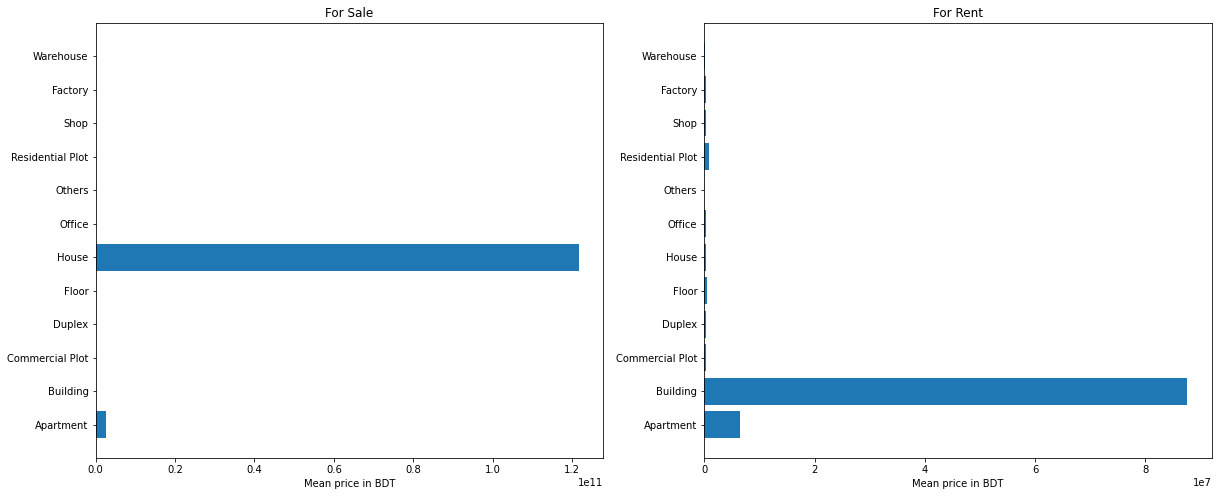

In [84]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_sale_price'])
ax[0].set_title('For Sale')
# ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT')


# # Second plot
ax[1].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_rent_price'])
ax[1].set_title('For Rent')
# ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

We cannot gain to much information from the above plot. Let's improve it by using log scale on the x-axis.

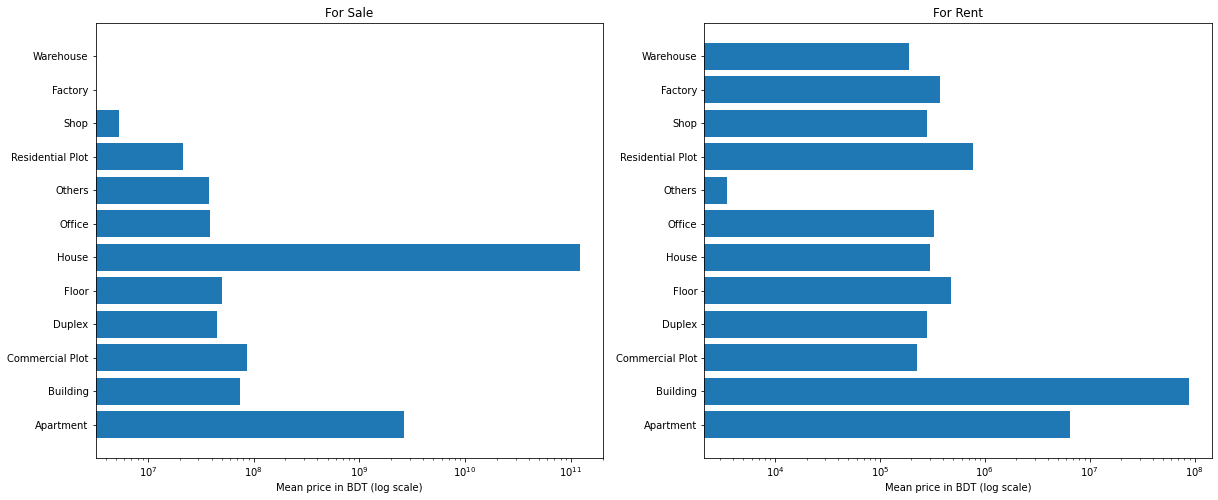

In [85]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_sale_price'])
ax[0].set_title('For Sale')
ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT (log scale)')


# # Second plot
ax[1].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_rent_price'])
ax[1].set_title('For Rent')
ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT (log scale)')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

<span id="types-vs-prices-worth--interpretation"></span>

       
TODO : 
- Provide interpretation for the above plot


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-locations"></span>
 
[EDA](#eda)  
### 10. How do property prices fluctuate for same location?
We want to understand how the prices fluctuate for the same location. For this purpose, we will use boxplot on each city.   
This question was explored by Group 03.

In [86]:
# # Mean price per location
# mean_price_per_location = df.groupby("city")["price"].mean()
# mean_price_per_location

In [87]:
# Separating the dataframe prices according to purpose
rent_df = df[df["purpose"]=="Rent"]
sale_df= df[df["purpose"]=="Sale"]
rent_df.shape, sale_df.shape

((20723, 24), (12978, 24))

In [88]:
rent_df.describe()["price"]

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
max      1.000000e+11
Name: price, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/var/folders/jw/n8wft_y53cd1wy9pvyztfvc00000gr/T/ipykernel_39780/631064985.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(min_, max_);


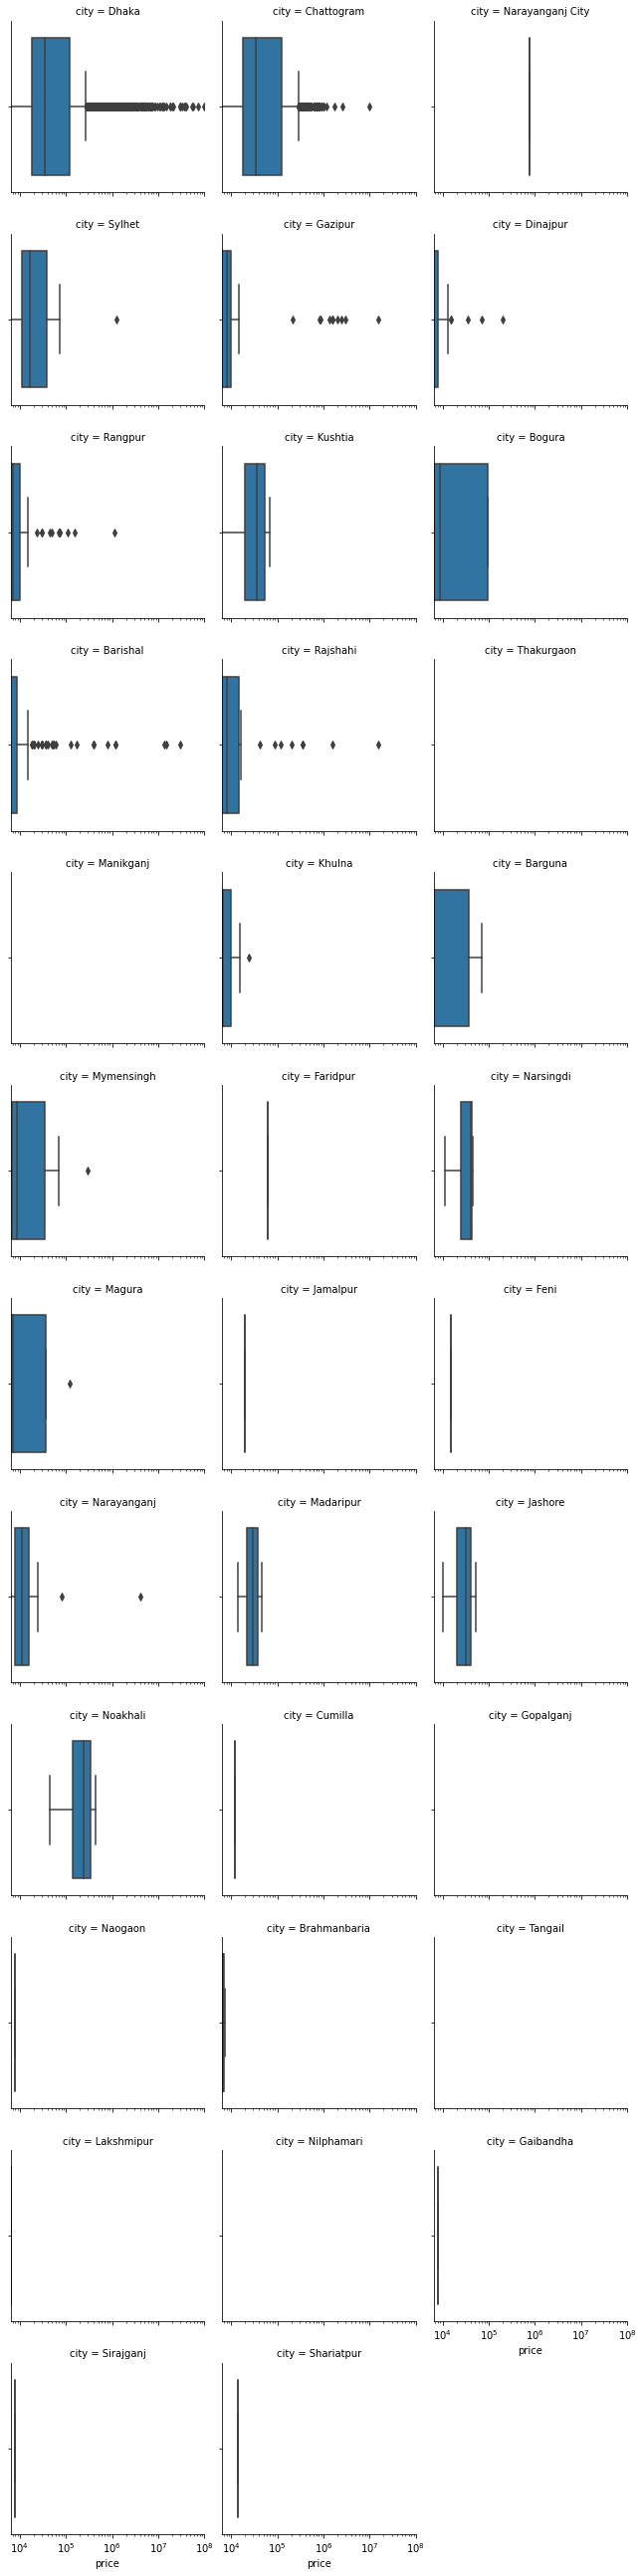

In [89]:
# Distribution of rent prices per cities
g = sb.FacetGrid(data=rent_df, col="city", col_wrap=3)
g.map(sb.boxplot, "price")

plt.xscale("log")

min_ = -8.39*10e8 # 0*0e0 #-1.2e3 +100
max_ = 1*10e7 #np.log10(rent_df.max())+ binsize   

plt.xlim(min_, max_);

The above plot depicts the rent prices variation over the cities ranged based on their properties count.

The prices variation for the top 02 cities (Dhaka and Chattogram) is very small (since we can observe it only on a log scale)

We can also see that there are place with no price variation at all. It should be related to the fact that we have a very small number of properties here.


In [90]:
sale_df.describe()["price"]

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
max      2.400000e+13
Name: price, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/var/folders/jw/n8wft_y53cd1wy9pvyztfvc00000gr/T/ipykernel_39780/2388231018.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(min_, max_);


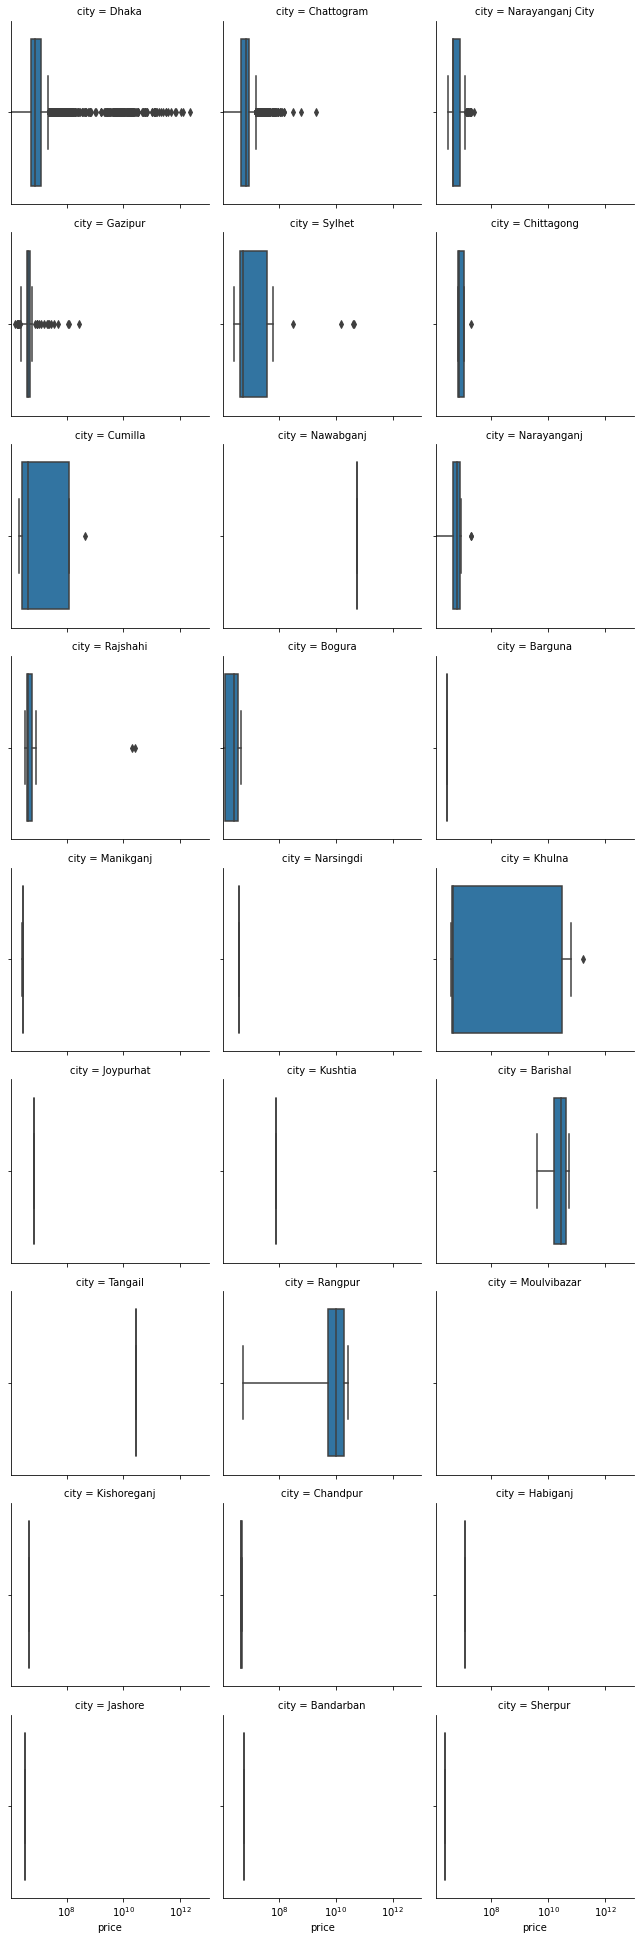

In [91]:
# Distribution of sale prices per cities
g = sb.FacetGrid(data=sale_df, col="city", col_wrap=3)
g.map(sb.boxplot, "price")

plt.xscale("log")

min_ = -4.12*10e11 
max_ = 1*10e12 

plt.xlim(min_, max_);

The above plot depicts the sale prices variation over the cities ranged based on their properties count.

The prices variation for our cities is very small (since we can observe it only on a log scale), with many outliers.

We can also see that there are place with no price variation at all. It should be related to the fact that we have a very small number of properties here.


<span id="prices-vs-locations--interpretation"></span>

 
Either for sale or rent, the properties prices variation is very small (since we need to plot them on a log scale in order to observe them). There are places were the variation is nearly none 


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="prices--vs--properties-size"></span>

 
[EDA](#eda)  
### 11. How do property prices fluctuate for same property size?
We want to understand how the relationship between prices and property sizes.   
This question was explored by Group 03.

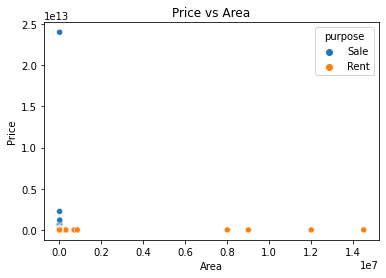

In [92]:
sb.scatterplot(data=df, x="area",y="price", hue="purpose")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area");

Our first remark is the outliers (value over 0.2 over the x-axis and over 0.5 over the y-axis). We will zoom-in the x-axis in order to better see the correlation between our two variables, though there seem to not be none.

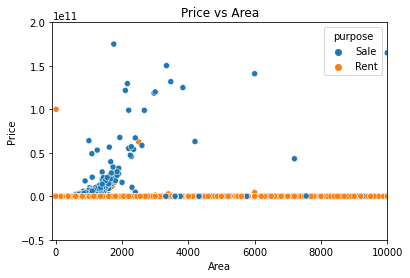

In [93]:
sb.scatterplot(data=df, x="area",y="price", hue="purpose")

plt.xlim(-100, 10000)
plt.ylim(-.5*1e11, .2*1e12) #plt.ylim(-.5*1e11, .5*1e11) #

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area");


<span id="prices--vs--properties-size--interpretation"></span>

We can observe that:
* For sale, there is a **very weak** (please note the scale of the y-axis) linear correlation between price and area. The prices tend to increase until we reach 3500 sqft, after which the prices seem to no more be correlated to the area. 
* For rent, the price is clearly not related to the area.



<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-amenities"></span>

[EDA](#eda)  
### 12. How do property prices fluctuate for same / similar amenities?
We want to understand how similar amenities, grouped together, can impact the prices. We will also use this opportunity to observe the impact of other numercial variables on the prices.   
This question was explored by Group 03.

Let's explore the correlation between those variables.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [95]:
numerical_vars = ["area","num_bed_rooms","num_bath_rooms",
                  "relaxation_amenity_count", "security_amenity_count","maintenance_or_cleaning_amenity_count",
                  "social_amenity_count", "expendable_amenity_count","unclassify_amenity_count",
                  "price"]
numerical_vars

['area',
 'num_bed_rooms',
 'num_bath_rooms',
 'relaxation_amenity_count',
 'security_amenity_count',
 'maintenance_or_cleaning_amenity_count',
 'social_amenity_count',
 'expendable_amenity_count',
 'unclassify_amenity_count',
 'price']

In [96]:
# Correlation between numerical features
df[numerical_vars].corr()

,area,num_bed_rooms,num_bath_rooms,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,unclassify_amenity_count,price
area,1.000000,0.001957,0.005682,-0.000674,-0.006134,-0.008345,-0.002119,-0.007998,-0.005622,0.000378
num_bed_rooms,0.001957,1.000000,0.495833,0.020519,0.017319,0.011440,-0.046400,0.013382,0.021779,0.026236
num_bath_rooms,0.005682,0.495833,1.000000,-0.008835,-0.171149,-0.291741,-0.092607,-0.255924,-0.231107,0.025625
relaxation_amenity_count,-0.000674,0.020519,-0.008835,1.000000,0.106834,0.073350,0.435223,0.141310,0.174095,-0.000589
security_amenity_count,-0.006134,0.017319,-0.171149,0.106834,1.000000,0.601155,0.241218,0.616629,0.719295,-0.005356
maintenance_or_cleaning_amenity_count,-0.008345,0.011440,-0.291741,0.073350,0.601155,1.000000,0.234086,0.737492,0.615686,-0.006237
social_amenity_count,-0.002119,-0.046400,-0.092607,0.435223,0.241218,0.234086,1.000000,0.271053,0.264927,-0.001603
expendable_amenity_count,-0.007998,0.013382,-0.255924,0.141310,0.616629,0.737492,0.271053,1.000000,0.649144,-0.006176
unclassify_amenity_count,-0.005622,0.021779,-0.231107,0.174095,0.719295,0.615686,0.264927,0.649144,1.000000,-0.006887
price,0.000378,0.026236,0.025625,-0.000589,-0.005356,-0.006237,-0.001603,-0.006176,-0.006887,1.000000


Let's use a heatmap to make interesting relationship easier to locate.

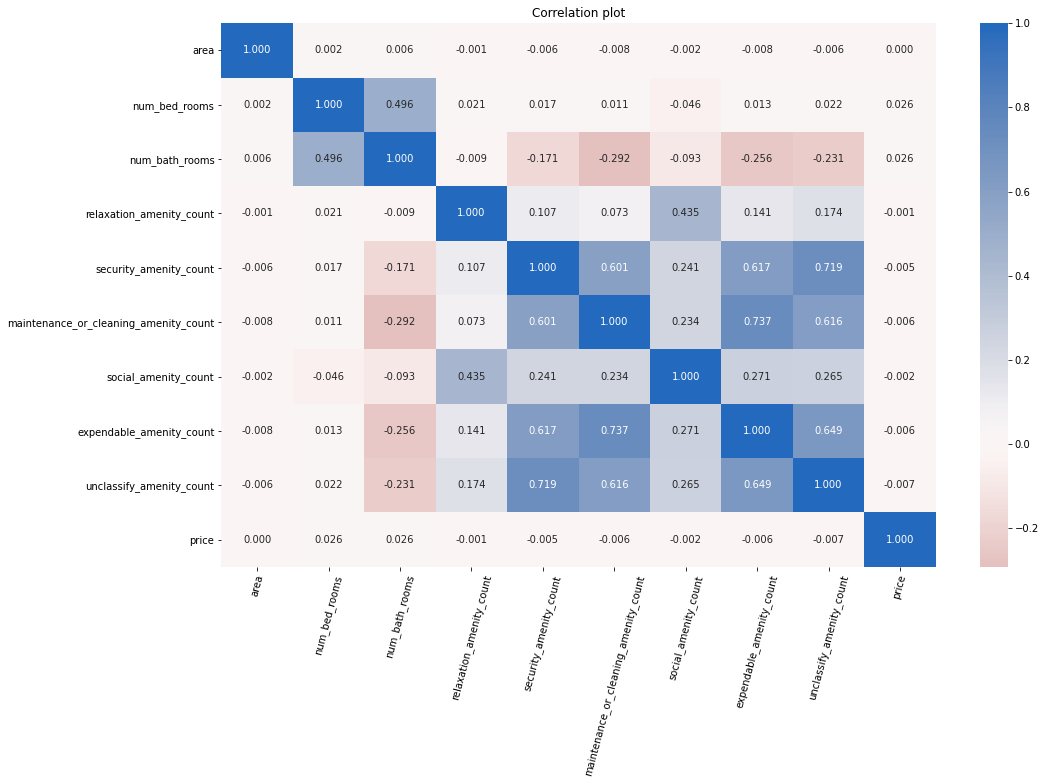

In [97]:
# Correlation plot for the whole dataset
plt.figure(figsize = [16, 10])
sb.heatmap(df[numerical_vars].corr(), annot = True, fmt = ".3f", cmap = "vlag_r", center = 0)
#plt.show()

plt.title("Correlation plot")

plt.xticks(rotation=75);

There doesn't seem to be a relationship between price and the other variables. Let's observe the correlation separatly for each purpose (rent/sale).

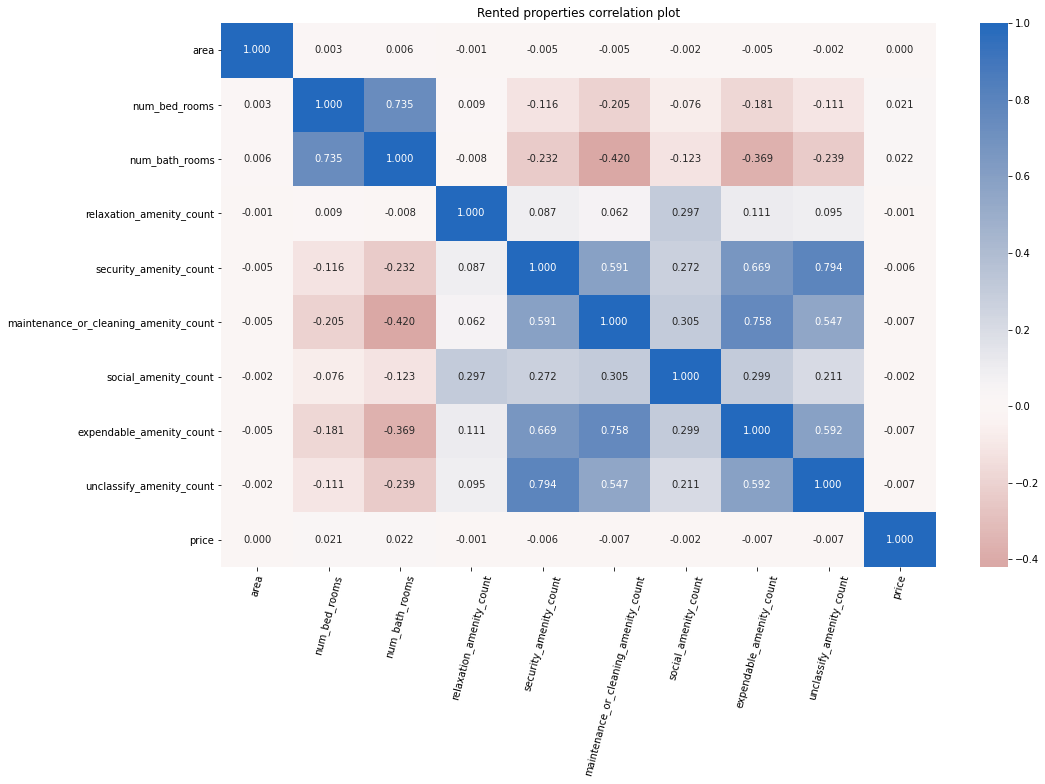

In [98]:
# Correlation plot for the sub-dataset: rent
plt.figure(figsize = [16, 10])
sb.heatmap(rent_df[numerical_vars].corr(), annot = True, fmt = ".3f", cmap = "vlag_r", center = 0)
#plt.show()

plt.title("Rented properties correlation plot")

plt.xticks(rotation=75);

The above plot allow us to confirm that there is no linear correlation between the price and the area for rented properties.        
Furthermore, we can also observe that there is no correlation of the `*_amenity_count` variables on the price.

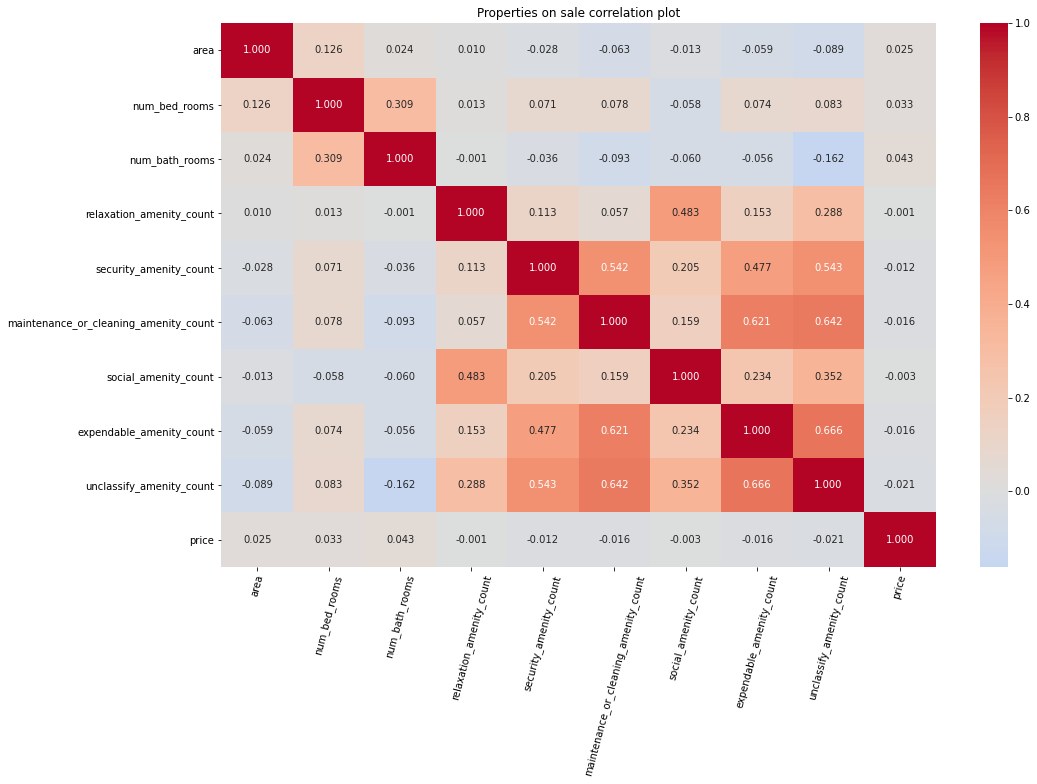

In [99]:
# Correlation plot for the sub-dataset: sale
plt.figure(figsize = [16, 10])
sb.heatmap(sale_df[numerical_vars].corr(), annot = True, fmt = ".3f", cmap = "coolwarm", center = 0)
#plt.show()

plt.title("Properties on sale correlation plot")

plt.xticks(rotation=75);

Here also, we can't also see any linear correlation between price and the `*_amenity_count` variables


<span id="prices-vs-amenities-interpretation"></span>

There doesn't seem to be a (linear) relationship between the prices and the number of amenities when those amenities are grouped in categories. 



<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="amenities--vs--residential-properties"></span>


[EDA](#eda)  
### 13. Which amenities are the more frequent in Residential properties ?

This question was explored by Group 03.

In [100]:
# Extract residential properties
residential_df = df[df["building_nature"]=="Residential"]
residential_df.shape

(27220, 24)

In [101]:
res_amenities_frequencies = residential_df[amenities_vars].mean().sort_values(ascending=False)
res_amenities_frequencies

unclassify_amenity_count                 1.746767
expendable_amenity_count                 1.142873
maintenance_or_cleaning_amenity_count    0.751359
security_amenity_count                   0.471749
social_amenity_count                     0.060801
service_staff_amenity_count              0.025312
relaxation_amenity_count                 0.014989
dtype: float64

In [102]:
# Round the amenities frequencies
res_amenities_frequencies = np.round(res_amenities_frequencies)
res_amenities_frequencies

unclassify_amenity_count                 2.0
expendable_amenity_count                 1.0
maintenance_or_cleaning_amenity_count    1.0
security_amenity_count                   0.0
social_amenity_count                     0.0
service_staff_amenity_count              0.0
relaxation_amenity_count                 0.0
dtype: float64

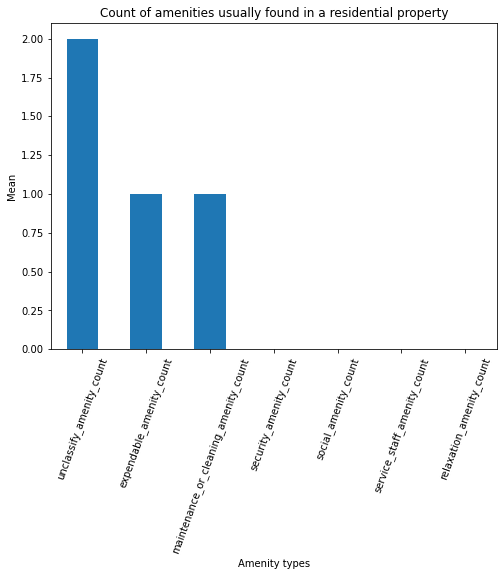

In [103]:
res_amenities_frequencies.plot(kind="bar", figsize=(8,6))

plt.xticks(rotation=70)

plt.xlabel("Amenity types")
plt.ylabel("Mean")
plt.title("Count of amenities usually found in a residential property");

<span id="amenities--vs--residential-properties-interpretation"></span>

In residential properties, we usually found 01 expendable amenity and 01 maintenance/cleaning amenity. As for other type of amenities, they are rarely found.


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="amenities--vs--commercial-properties"></span>

[EDA](#eda)  
### 14. Which amenities are the more frequent in Commercial properties ?

This question was explored by Group 03.

In [104]:
# Extract commercial properties
commercial_df= df[df["building_nature"]=="Commercial"]
commercial_df.shape

(6481, 24)

In [105]:
com_amenities_frequencies = commercial_df[amenities_vars].mean().sort_values(ascending=False)
com_amenities_frequencies

unclassify_amenity_count                 2.079463
expendable_amenity_count                 1.382811
maintenance_or_cleaning_amenity_count    0.903256
security_amenity_count                   0.600216
social_amenity_count                     0.162321
relaxation_amenity_count                 0.009258
service_staff_amenity_count              0.004320
dtype: float64

In [106]:
# Round the amenities frequencies
com_amenities_frequencies = np.round(com_amenities_frequencies)
com_amenities_frequencies

unclassify_amenity_count                 2.0
expendable_amenity_count                 1.0
maintenance_or_cleaning_amenity_count    1.0
security_amenity_count                   1.0
social_amenity_count                     0.0
relaxation_amenity_count                 0.0
service_staff_amenity_count              0.0
dtype: float64

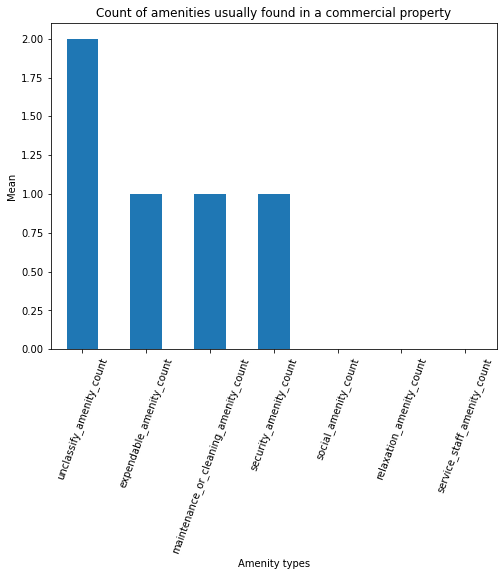

In [107]:
com_amenities_frequencies.plot(kind="bar", figsize=(8,6))

plt.xticks(rotation=70)

plt.xlabel("Amenity types")
plt.ylabel("Mean")
plt.title("Count of amenities usually found in a commercial property");

<span id="amenities--vs--commercial-properties-interpretation"></span>

In commercial properties, we usually found 01 expendable amenity, 01 maintenance/cleaning amenity, and 01 security amenity. Other types of amenities are rarely found.

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="property-density-variation"></span>

[EDA](#eda)  
### 15. How does the available properties density vary across the country ?
We had explored the [distribution of properties per city](#properties-vs-cities). Now, we want to analyzes how those properties are distributed(concentrated) over different place accorss Bangladesh, as a high density place should mean high density population, which in turn should mean higher prices compared to other places.
Overall, we are trying to answer the following question: on a sqft, how many properties do we expect to find ?
(another approch could have been: given a property, which surface do we expect it to occupy ?)     
This question was explored by Group 05.

We are going to order the cities in the dataset according to their properties count (in order to have the same ordering in all our plot)

In [108]:
# Recalling the content of our properties count per city
properties_per_city[:10], properties_per_city.size

(Dhaka               28681
 Chattogram           3481
 Narayanganj City      441
 Barishal              352
 Gazipur               323
 Rangpur                73
 Dinajpur               64
 Sylhet                 57
 Rajshahi               56
 Narayanganj            49
 Name: city, dtype: int64,
 44)

In [109]:
# Retrieve the cities ordered according to their properties count
ordered_cities = properties_per_city.sort_values(ascending=False).index.to_list()
ordered_cities[:10]

['Dhaka',
 'Chattogram',
 'Narayanganj City',
 'Barishal',
 'Gazipur',
 'Rangpur',
 'Dinajpur',
 'Sylhet',
 'Rajshahi',
 'Narayanganj']

In [110]:
# Setting order in our city variable
ordered_cities_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_cities)
df["city"] = df["city"].astype(ordered_cities_variable)
df["city"].dtypes

CategoricalDtype(categories=['Dhaka', 'Chattogram', 'Narayanganj City', 'Barishal',
                  'Gazipur', 'Rangpur', 'Dinajpur', 'Sylhet', 'Rajshahi',
                  'Narayanganj', 'Khulna', 'Thakurgaon', 'Mymensingh',
                  'Bogura', 'Cumilla', 'Narsingdi', 'Magura', 'Chittagong',
                  'Manikganj', 'Barguna', 'Jashore', 'Kushtia', 'Chandpur',
                  'Nilphamari', 'Madaripur', 'Noakhali', 'Brahmanbaria',
                  'Tangail', 'Moulvibazar', 'Bandarban', 'Faridpur',
                  'Jamalpur', 'Feni', 'Joypurhat', 'Kishoreganj', 'Habiganj',
                  'Gaibandha', 'Nawabganj', 'Gopalganj', 'Sherpur',
                  'Lakshmipur', 'Sirajganj', 'Naogaon', 'Shariatpur'],
, ordered=True)

Now we are going to compute again the total properties count per city (in order to have our count ordered by cities)

In [112]:
properties_count_per_city = df["city"].value_counts().sort_index()
properties_count_per_city[:10]

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Name: city, dtype: int64

Now let's compute the total area of the properties per city

In [116]:
total_property_area_per_city = df[ ["city","area"] ].groupby("city").sum() \
                                                    .reset_index()
total_property_area_per_city[:10]

,city,area
0,Dhaka,99337494.8
1,Chattogram,6511583.8
2,Narayanganj City,1293154.6
3,Barishal,286617.0
4,Gazipur,1445576.0
5,Rangpur,75404.0
6,Dinajpur,61465.0
7,Sylhet,87770.0
8,Rajshahi,60424.0
9,Narayanganj,152181.0


In [151]:
# Creating new df
city_stats_df= pd.DataFrame()

# Inserting into new df statistical data for each city
city_stats_df["city"] = total_property_area_per_city["city"]
city_stats_df["properties_count"] = properties_count_per_city.values
city_stats_df["properties_area"] = total_property_area_per_city["area"]

# Compute density of available properties per city
city_stats_df["properties_density"] = city_stats_df["properties_area"] / city_stats_df["properties_count"] 
# city_stats_df["properties_density"] =city_stats_df["properties_count"] /city_stats_df["properties_area"]
city_stats_df

,city,properties_count,properties_area,properties_density
0,Dhaka,28681,99337494.8,3463.529682
1,Chattogram,3481,6511583.8,1870.607239
2,Narayanganj City,441,1293154.6,2932.323356
3,Barishal,352,286617.0,814.252841
4,Gazipur,323,1445576.0,4475.467492
5,Rangpur,73,75404.0,1032.931507
6,Dinajpur,64,61465.0,960.390625
7,Sylhet,57,87770.0,1539.824561
8,Rajshahi,56,60424.0,1079.000000
9,Narayanganj,49,152181.0,3105.734694


Now that we have the density per city, let's plot it to gain more informations.


<!-- **Note**: According to my search on google, population density should be "population count divided by total area", but here we did "total area divided by properties count". make sure with the collaborator if it is right, or if there is some error. -->

In [152]:
# City size information was extracted from: 
# https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Bangladesh

city_area = pd.DataFrame({'city': ["Dhaka", "Chattogram", "Khulna", "Sylhet", "Rajshahi", 
                                  "Mymensingh", "Rangpur", "Cumilla", "Barishal", "Narayanganj City", 
                                  "Gazipur", "Bhairab", "Bogura", "Brahmanbaria", "Chandpur", 
                                  "Chowmuhani", "Chuadanga", "Cumilla Sadar Dakshin", "Cox's Bazar", 
                                  "Dinajpur", "Faridpur", "Feni", "Jamalpur", "Jashore", "Jhenaidah", 
                                  "Bandar", "Kaliakair", "Kishoreganj", "Kushtia", "Maijdee", "Naogaon", 
                                  "Narsingdi", "Nawabganj", "Pabna", "Saidpur", "Satkhira", "Savar", 
                                  "Siddhirganj", "Sirajganj", "Sreepur", "Tangail", "Tarabo", "Tongi"],
                         'city_size_kmsq': [316, 155, 51, 49, 42, 90, 69, 50, 51, 13, 
                                            47, 15.71, 68.63, 22.49, 26.82, 35.5, 38, 31.01, 
                                            24.45, 22, 19.78, 22, 55.25, 28.56, 44.33, 11.28, 
                                            27.16, 11.3, 66, 23.79, 37.08, 20.95, 32.9, 
                                            27.27, 30.04, 32.39, 13.54, 22.71, 31.27, 46.9, 
                                            33.8, 19.39, 32.07]
                        })

city_area.head()

,city,city_size_kmsq
0,Dhaka,316.0
1,Chattogram,155.0
2,Khulna,51.0
3,Sylhet,49.0
4,Rajshahi,42.0


In [153]:
# NOTE: for some of the cities the info about their size was not available for various reasons
# (e.g. they are not listed as cities on Wikipedia -- Thakurgaon)
# Hence the inner join => avoid cities with NaNs (they anyway had very few (<5) properties)

city_stats_df = pd.merge(city_stats_df, city_area, on='city', how='inner')

In [154]:
city_stats_df.shape

(26, 5)

In [157]:
city_stats_df

,city,properties_count,properties_area,properties_density,city_size_kmsq
0,Dhaka,28681,99337494.8,3463.529682,316.00
1,Chattogram,3481,6511583.8,1870.607239,155.00
2,Narayanganj City,441,1293154.6,2932.323356,13.00
3,Barishal,352,286617.0,814.252841,51.00
4,Gazipur,323,1445576.0,4475.467492,47.00
5,Rangpur,73,75404.0,1032.931507,69.00
6,Dinajpur,64,61465.0,960.390625,22.00
7,Sylhet,57,87770.0,1539.824561,49.00
8,Rajshahi,56,60424.0,1079.000000,42.00
9,Khulna,39,48775.0,1250.641026,51.00


In [158]:
city_stats_df['properties_density_norm'] = city_stats_df.properties_density / city_stats_df.city_size_kmsq

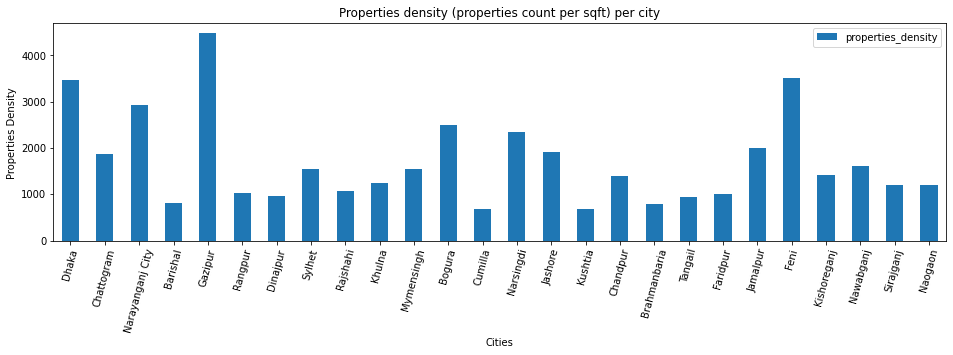

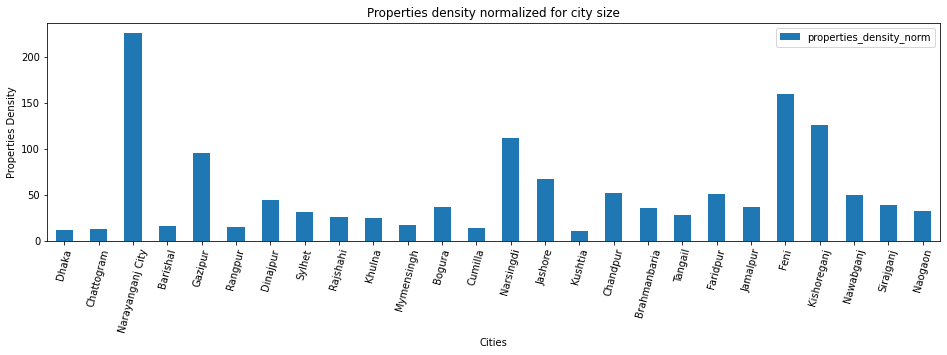

In [172]:
# Plotting properties densities per cities
city_stats_df.plot(kind="bar", x="city", y="properties_density", figsize=(16,4))

plt.xticks(rotation=75)

plt.xlabel("Cities")
plt.ylabel("Properties Density ")
plt.title("Properties density (properties count per sqft) per city");

city_stats_df.plot(kind="bar", x="city", y="properties_density_norm", figsize=(16,4))

plt.xticks(rotation=75)

plt.xlabel("Cities")
plt.ylabel("Properties Density")
plt.title("Properties density normalized for city size");

<span id="property-density-variation-interpretation"></span>

**The density is the number of properties we are expecting to find on a given surface (here, one sqft)**. 

On one sqft, we are expecting to find nearly 4,000 properties in `Dhaka`, against 2,000 properties in `Chattogram` for the same surface.

Other places densities are irrelevant to us since their properties count is too little to be of interest to us. But we can notice that their is a large surface for each property to occupy in `Thakurgaon, Barguna, Shariatpur, Gopalganj`, though we cannot really trust that data with the very little amount of informations with about properties over there.


Another thing we should be interested in is to correlate the density of properties over cities to the mean prices over those same cities That question was explored [here](#property-density-variation--vs--price-variation).

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

**TODO:** redo the same plot as above, while putting `purpose` as hue 

In [94]:
# # Let's remove the outliers cities (where density is abnormaly too high) from the 
# #  list an re-plot the density agains cities

# # Creating a copy of our city_stats_df
# city_stats_df_without_outliers = city_stats_df.copy()
# city_stats_df_without_outliers.head()

In [95]:
# # Removing outlier cities (where density is abnormaly too high)
# print(city_stats_df_without_outliers.shape)
# city_stats_df_without_outliers = city_stats_df_without_outliers[ ~ city_stats_df_without_outliers["city"]. \
#                                                                 isin(["Moulvibazar","Joypurhat"])]

# print(city_stats_df_without_outliers.shape)

In [96]:
# # Plotting properties densities per cities
# city_stats_df_without_outliers.plot(kind="bar", x="city", y="properties_density", figsize=(16,6))

# plt.xticks(rotation=80)

# plt.xlabel("Cities")
# plt.ylabel("Properties Density")
# plt.title("Properties density per city");

xx

<!-- <span id="property-density-variation-interpretation"></span>

**The density is the mean surface that a property has (tend to occupy) in a given place**. 

We can see from the above plot `Dhaka` is the cities with the highest property's density (a property generally occupy 0.00025 sqft). This density is too time higher than `Chattogram` , where a property generally occupy 0.00050 sqft.   

The density may seem suspicious since it's vary small, but this can indicate that there are many properties in building (or similar properties with many floor).

Other places densities are irrelevant to us since their properties count is too little to be of interest to us. But we can notice that their is a large surface for each property to occupy in `Thakurgaon, Barguna, Shariatpur, Gopalganj`, though we cannot really trust that data with the very little amount of informations with about properties over there.



Another thing we should be interested in is to correlate the density of properties over cities to the mean prices over those same cities That question was explored [here](#property-density-variation--vs--price-variation).

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention). -->

<span id="property-density-variation--vs--price-variation"></span>

[EDA](#eda)  
### 16. How does the density of available properties influence the price?

We want to explore:
- How the [available properties density variation across the zones and cities](#property-density-variation) is related to price variation over those same places?
- How mean property prices are distributed across different zones?

This question was also explored by Group 05.

In [175]:
# Mean price per building type
mean_price_per_zone = df[ ["zone","purpose","price"] ].groupby(["zone","purpose"], as_index=False) \
                                                               .mean()

mean_price_per_zone.rename(columns={
    "price":"mean_price_byZone"
}, inplace=True)

mean_price_per_zone

,zone,purpose,mean_price_byZone
0,Badda,Rent,1.924838e+06
1,Badda,Sale,2.813953e+08
2,Banani,Rent,8.750827e+07
3,Banani,Sale,3.165632e+10
4,Bashundhara R/A,Rent,3.121132e+05
...,...,...,...
123,Tejgaon,Sale,5.337122e+08
124,Turag,Rent,3.801429e+05
125,Turag,Sale,8.088813e+06
126,Uttara,Rent,3.751322e+05


In [178]:
# Mean price per building type
properties_per_zone = df[ ["zone","purpose"]].groupby(["zone","purpose"], as_index=False).size()

# properties_per_zone
# mean_price_per_zone.rename(columns={
#     "price":"mean_price_byZone"
# }, inplace=True)

properties_per_zone

,zone,purpose,size
0,Badda,Rent,682
1,Badda,Sale,349
2,Banani,Rent,870
3,Banani,Sale,77
4,Bashundhara R/A,Rent,1311
...,...,...,...
123,Tejgaon,Sale,81
124,Turag,Rent,14
125,Turag,Sale,96
126,Uttara,Rent,1787


In [179]:
zone_density_price = pd.merge(mean_price_per_zone, properties_per_zone, on=['zone', 'purpose'], how='inner')

In [185]:
zone_density_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zone               128 non-null    object 
 1   purpose            128 non-null    object 
 2   mean_price_byZone  128 non-null    float64
 3   size               128 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ KB


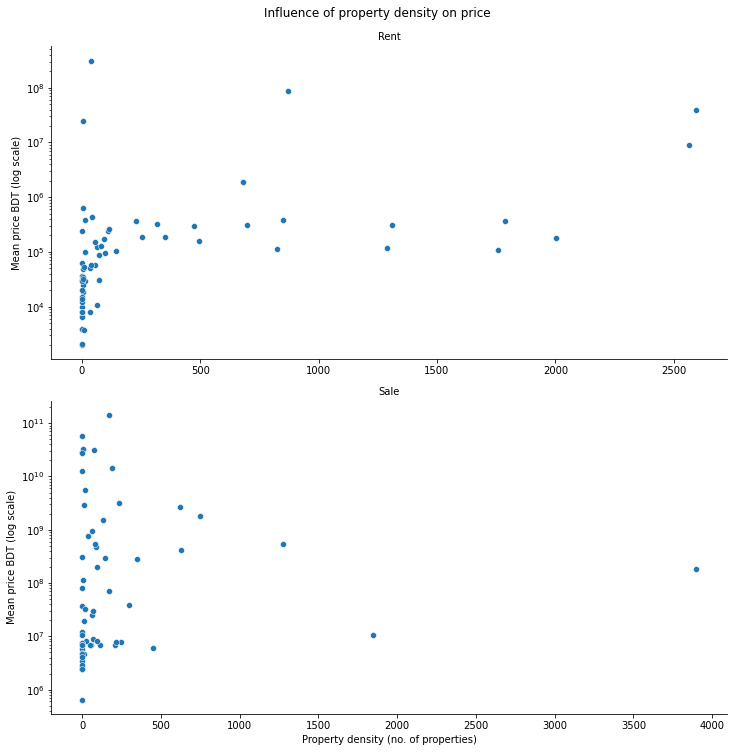

In [188]:
# 
# 
data = zone_density_price

g = sb.relplot(y="mean_price_byZone", x="size", 
                data = data,
                row = "purpose",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=5, aspect=2
               )

g.set_titles('{row_name}', fontsize=24)
g.set_axis_labels('Property density (no. of properties)', 'Mean price BDT (log scale)')

# g.fig.suptitle('Price vs. area for each property type and purpose', fontsize=12, y=1.02)
g.fig.suptitle('Influence of property density on price', fontsize=12, y=1.02)

# Log transform the y-axis for each subplot
for ax in g.axes.flat:
    ax.set_yscale('log')

plt.plot()

# Exporting the plot image
g.savefig(f"{exported_img_folder}/Zone-Density-vs-Price-Scatterplot.jpg")

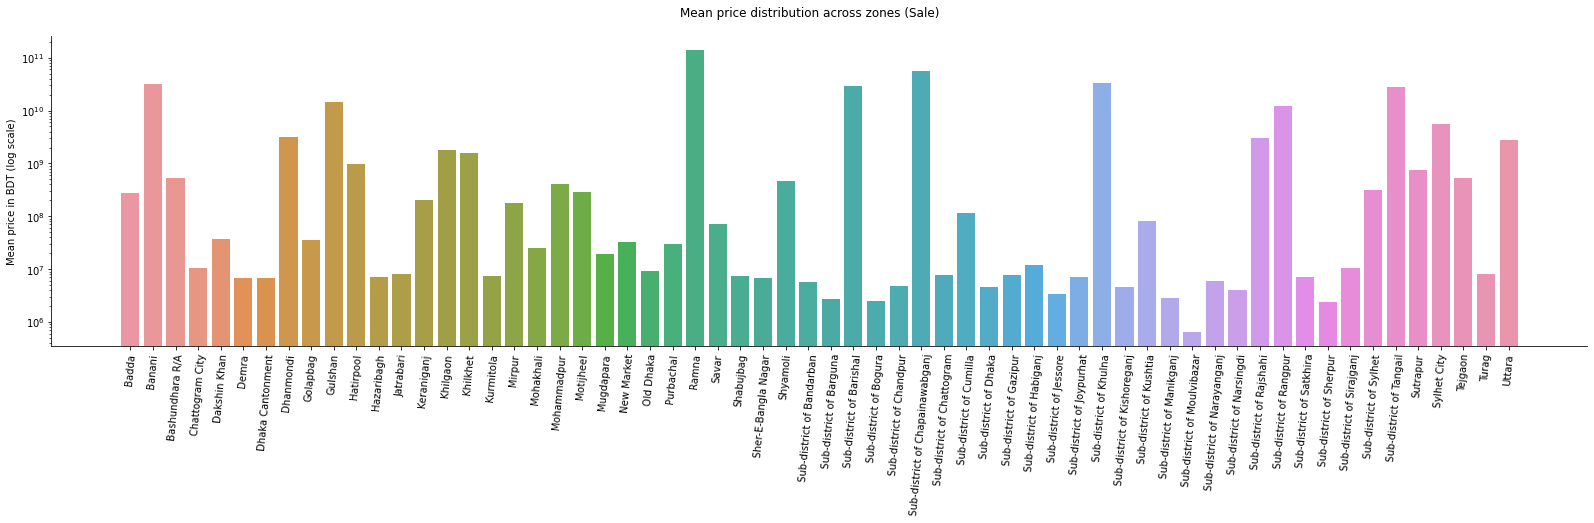

In [218]:
# 
# 
data = zone_density_price[zone_density_price.purpose == 'Sale'].sort_values(by='zone')

g = sb.catplot(y="mean_price_byZone", x="zone", 
                data = data,
#                 row = "purpose",
                kind="bar",
                facet_kws={'sharey': False, 'sharex': False},
                height=5, aspect=4.4
               )

g.set_titles('{row_name}', fontsize=24)
g.set_axis_labels('', 'Mean price in BDT (log scale)')

# g.fig.suptitle('Price vs. area for each property type and purpose', fontsize=12, y=1.02)
g.fig.suptitle('Mean price distribution across zones (Sale)', fontsize=12, y=1.02)

g.set_xticklabels(rotation=85)

# Log transform the y-axis for each subplot
plt.yscale('log')

plt.plot()

# Exporting the plot image
g.savefig(f"{exported_img_folder}/Zone-price-variation-Sale.jpg")

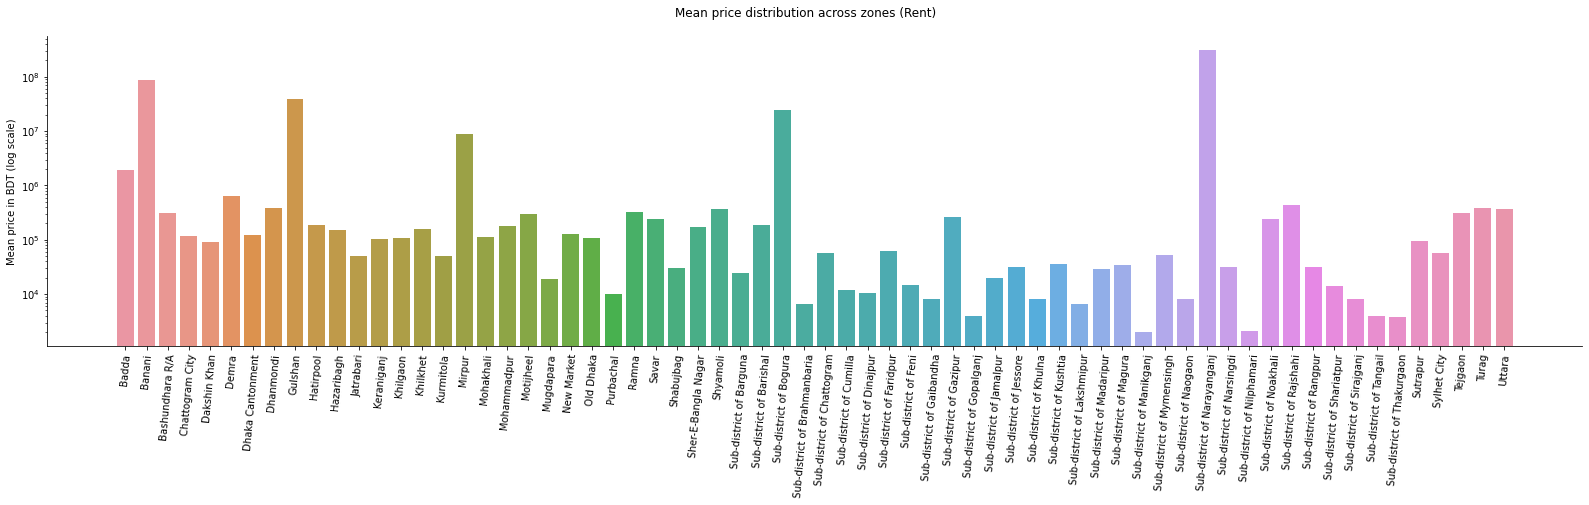

In [219]:
# 
# 
data = zone_density_price[zone_density_price.purpose == 'Rent'].sort_values(by='zone')

g = sb.catplot(y="mean_price_byZone", x="zone", 
                data = data,
#                 row = "purpose",
                kind="bar",
                facet_kws={'sharey': False, 'sharex': False},
                height=5, aspect=4.4
               )

g.set_titles('{row_name}', fontsize=24)
g.set_axis_labels('', 'Mean price in BDT (log scale)')

# g.fig.suptitle('Price vs. area for each property type and purpose', fontsize=12, y=1.02)
g.fig.suptitle('Mean price distribution across zones (Rent)', fontsize=12, y=1.02)

g.set_xticklabels(rotation=85)

# Log transform the y-axis for each subplot
plt.yscale('log')

plt.plot()

# Exporting the plot image
g.savefig(f"{exported_img_folder}/Zone-price-variation-Rent.jpg")

In [205]:
data

,zone,purpose,mean_price_byZone,size
34,Mirpur,Sale,1.808188e+08,3898
7,Chattogram City,Sale,1.065715e+07,1848
5,Bashundhara R/A,Sale,5.409579e+08,1276
28,Khilgaon,Sale,1.800276e+09,746
38,Mohammadpur,Sale,4.134966e+08,629
...,...,...,...,...
85,Sub-district of Joypurhat,Sale,7.000000e+06,1
84,Sub-district of Jessore,Sale,3.430000e+06,1
81,Sub-district of Habiganj,Sale,1.189800e+07,1
59,Sub-district of Bandarban,Sale,5.812800e+06,1


Since our cities are ordered according to their properties count, let's observe their mean price per purpose (rent/sale).

In [173]:
# Mean price per building type
mean_price_per_city = df[ ["city","purpose","price"] ].groupby(["city","purpose"], as_index=False) \
                                                               .mean()

mean_price_per_city.rename(columns={
    "price":"mean_price"
}, inplace=True)

mean_price_per_city

,city,purpose,mean_price
0,Dhaka,Rent,1.105220e+07
1,Dhaka,Sale,3.492284e+09
2,Chattogram,Rent,1.155083e+05
3,Chattogram,Sale,1.022728e+07
4,Narayanganj City,Rent,7.500000e+05
...,...,...,...
83,Sirajganj,Sale,NaN
84,Naogaon,Rent,8.000000e+03
85,Naogaon,Sale,NaN
86,Shariatpur,Rent,1.400000e+04


In [98]:
# Computing the stats of the cities based on purpose
city_stats_per_purpose_df= city_stats_df.merge(mean_price_per_city, how="left",left_on="city",right_on="city")
city_stats_per_purpose_df.head()

,city,properties_count,properties_area,properties_density,purpose,mean_price
0,Dhaka,28681,99337494.8,3463.529682,Rent,1.105220e+07
1,Dhaka,28681,99337494.8,3463.529682,Sale,3.492284e+09
2,Chattogram,3481,6511583.8,1870.607239,Rent,1.155083e+05
3,Chattogram,3481,6511583.8,1870.607239,Sale,1.022728e+07
4,Narayanganj City,441,1293154.6,2932.323356,Rent,7.500000e+05


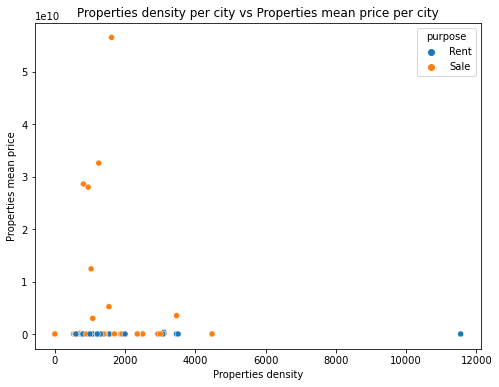

In [114]:
# Plotting Properties density vs Properties mean price
plt.figure(figsize=[8,6])
sb.scatterplot(data=city_stats_per_purpose_df, x="properties_density",y="mean_price", hue="purpose")

# plt.xlim(-100, 10000)
# plt.ylim(-.5*1e11, .2*1e12)

plt.xlabel("Properties density")
plt.ylabel("Properties mean price")
plt.title("Properties density per city vs Properties mean price per city");

<span id="property-density-variation--vs--price-variation--interpretation"></span>


There is no (linear) relationship between the density of properties in a given city, and its trending prices.

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

Let's take this opportunity to explore how other values can impact the prices.

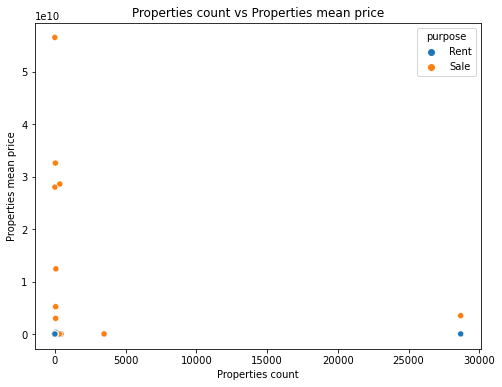

In [111]:
# Properties count vs Properties mean price
plt.figure(figsize=[8,6])
sb.scatterplot(data=city_stats_per_purpose_df, x="properties_count",y="mean_price", hue="purpose")

# plt.xlim(-100, 10000)
# plt.ylim(-.5*1e11, .2*1e12)

plt.xlabel("Properties count")
plt.ylabel("Properties mean price")
plt.title("Properties count vs Properties mean price");

We can see that there is no linear relationship between the number of properties in a city and its trending prices.

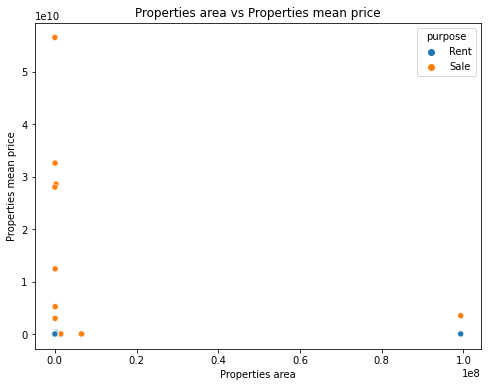

In [101]:
# Properties area vs Properties mean price
plt.figure(figsize=[8,6])
sb.scatterplot(data=city_stats_per_purpose_df, x="properties_area",y="mean_price", hue="purpose")

# plt.xlim(-100, 10000)
# plt.ylim(-.5*1e11, .2*1e12)

plt.xlabel("Properties area")
plt.ylabel("Properties mean price")
plt.title("Properties area vs Properties mean price");

Once again, we observe no linear relationship between the total properties area in a city and its trending prices.

<span id="outlier-analysis"></span>

[EDA](#eda)  
### 17. What are the outliers and how infomative are they?
    
This question was also explored by Group 02.

In [104]:
# Let's recall our rent/sale sub-dataframes
rent_df.shape, sale_df.shape

((20723, 24), (12978, 24))

#### (i) Ouliers in terms of prices

Let's explore the prices variation for rent and sale properties

In [105]:
# Prices variation for rent properties
price_rent_perc = rent_df.price.describe(percentiles=[0.05, .25, .5, .75, 0.95, .99])
price_rent_perc

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
5%       6.500000e+03
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [106]:
# Prices variation for sale properties
price_sale_perc = sale_df.price.describe(percentiles=[0.05, .25, .5, .75, 0.95, .99])
price_sale_perc

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
5%       3.000000e+06
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

**It seems top 1% prices are cosiderably high:**
1. For 'rent' ranging from 2.500000e+06 to 1.000000e+11
1. For 'sale' ranging from 5.423000e+09 to 2.400000e+13

<br>
**Is there something interesting / exceptional / erronous about these top 1% expensive properties?**

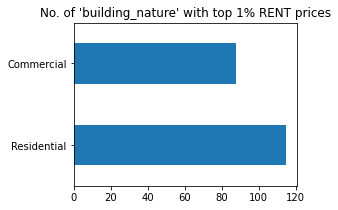

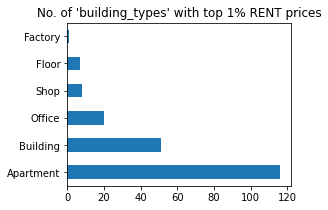

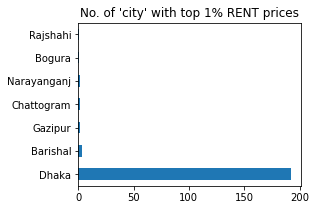

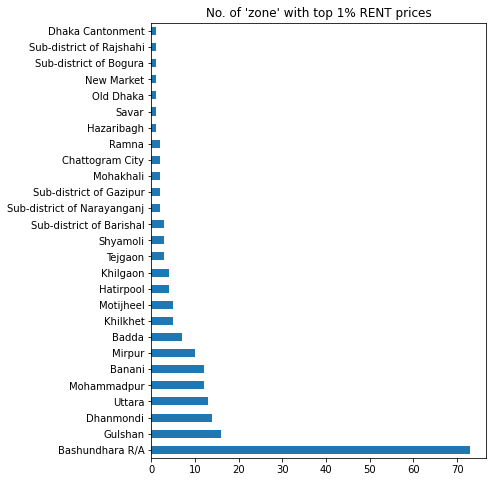

In [107]:
# Outliers distribution for properties on rent

rent_df[rent_df.price > price_rent_perc['99%']]['building_nature'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_nature\' with top 1% RENT prices")
plt.show()

rent_df[rent_df.price > price_rent_perc['99%']]['building_type'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_types\' with top 1% RENT prices")
plt.show()

rent_df[rent_df.price > price_rent_perc['99%']]['city'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'city\' with top 1% RENT prices")
plt.show()

rent_df[rent_df.price > price_rent_perc['99%']]['zone'].value_counts().plot(kind = 'barh', figsize=(6,8))
plt.title("No. of \'zone\' with top 1% RENT prices")
plt.show()

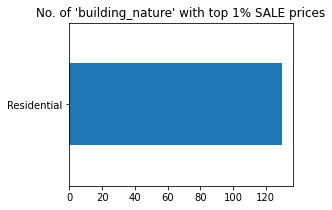

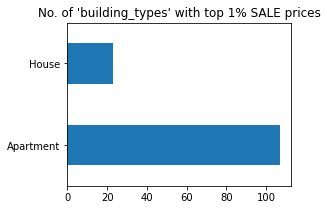

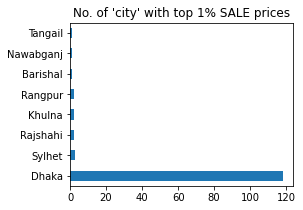

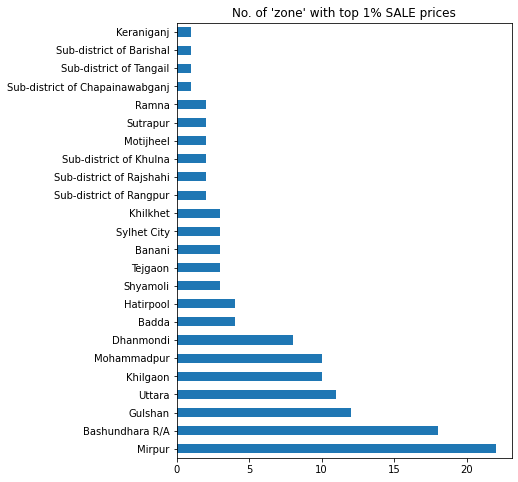

In [108]:
# Outliers distribution for properties on sale
sale_df[sale_df.price > price_sale_perc['99%']]['building_nature'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_nature\' with top 1% SALE prices")
plt.show()

sale_df[sale_df.price > price_sale_perc['99%']]['building_type'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_types\' with top 1% SALE prices")
plt.show()

sale_df[sale_df.price > price_sale_perc['99%']]['city'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'city\' with top 1% SALE prices")
plt.show()

sale_df[sale_df.price > price_sale_perc['99%']]['zone'].value_counts().plot(kind = 'barh', figsize=(6,8))
plt.title("No. of \'zone\' with top 1% SALE prices")
plt.show()

<span id="outlier-analysis-interpretation"></span>
Looking at the two charts above, we can see that:

1. **'Rent' properties that are outliers in terms of prices (top 1% expensive) are:**
    1. distributed across `Commercial` and `Residential` 'building_nature'
    1. distributed across various 'building_type' (`Apartment`, `Building`, `Office`, etc)
    1. predominantly in the `Bashundhar R/A` zone
    1. predominantly from `thetolet` and `pbazaar` portals (it's surprising that `thetolet` is one of the two top portals with expensive properties; since in general it has only fraction of the properties compared to `pbazaar`. Is it possible that properties listed on `thetolet` don't have reliable info?)

1. **'Sale' properties that are outliers in terms of prices (top 1% expensive) are:**
    1. all of `Residential` 'building_nature'
    1. mainly of `Apartment` and `House` 'building_type'
    1. predominantly in the `Mirpur` and `Bashundhar R/A` zone
    1. all from the `pbazaar` portal
    

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

#### (ii) Outliers in terms of `num_bath_rooms`

Let's explore rent case

In [125]:
bath_rent_perc = rent_df.num_bath_rooms.describe(percentiles=[0.05, .25, .5, .75, 0.95, .99])
price_rent_perc

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
5%       6.500000e+03
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

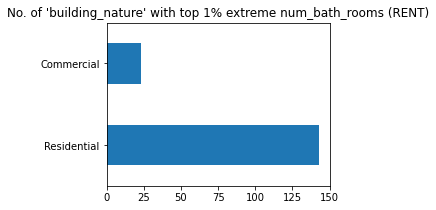

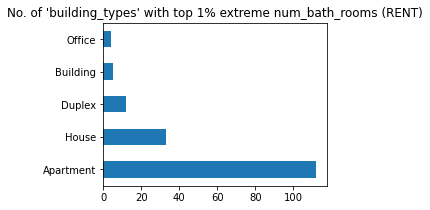

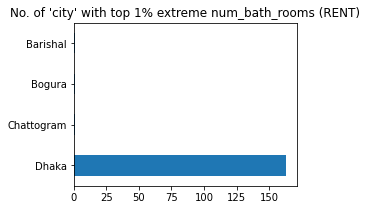

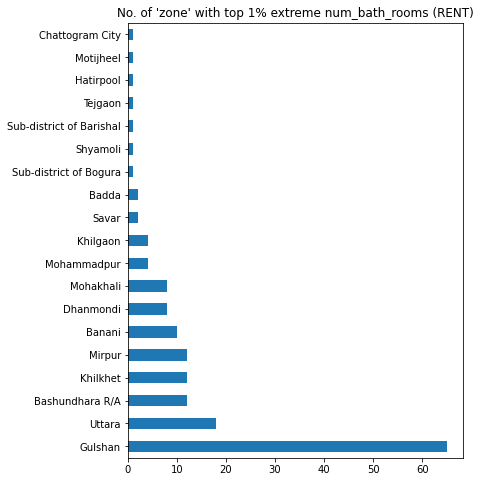

KeyError: 'site'

In [126]:
cut_off = bath_rent_perc['99%']

rent_df[rent_df.num_bath_rooms > cut_off]['building_nature'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_nature\' with top 1% extreme num_bath_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bath_rooms > cut_off]['building_type'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_types\' with top 1% extreme num_bath_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bath_rooms > cut_off]['city'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'city\' with top 1% extreme num_bath_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bath_rooms > cut_off]['zone'].value_counts().plot(kind = 'barh', figsize=(6,8))
plt.title("No. of \'zone\' with top 1% extreme num_bath_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bath_rooms > cut_off]['site'].value_counts().plot(kind = 'barh', figsize=(6,4))
plt.title("No. of \'website\' with top 1% extreme num_bath_rooms (RENT)")
plt.show()



Now let's explore sale cases.

In [128]:
bath_sale_perc = sale_df.num_bath_rooms.describe(percentiles=[0.05, .25, .5, .75, 0.95, .99])
bath_sale_perc

count    12978.000000
mean         1.483048
std          1.620236
min          0.000000
5%           0.000000
25%          0.000000
50%          2.000000
75%          3.000000
95%          4.000000
99%          5.000000
max         16.000000
Name: num_bath_rooms, dtype: float64

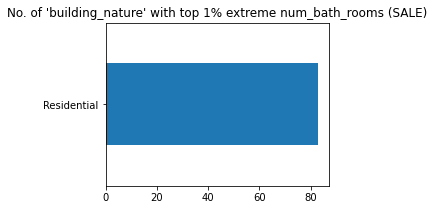

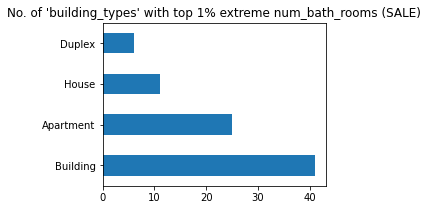

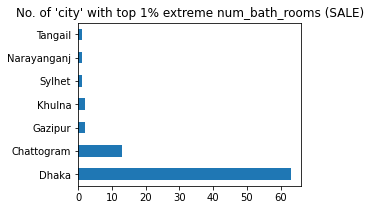

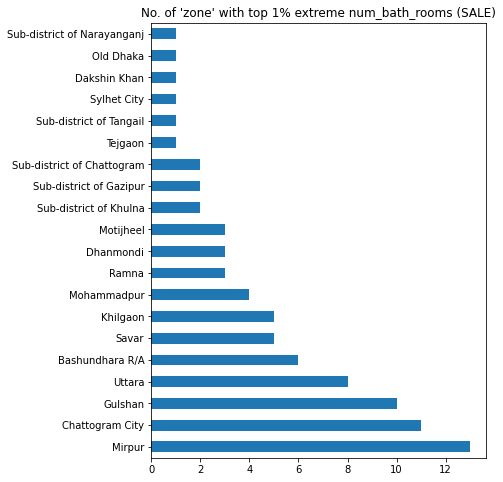

KeyError: 'site'

In [129]:
cut_off = bath_sale_perc['99%']

sale_df[sale_df.num_bath_rooms > cut_off]['building_nature'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_nature\' with top 1% extreme num_bath_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bath_rooms > cut_off]['building_type'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_types\' with top 1% extreme num_bath_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bath_rooms > cut_off]['city'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'city\' with top 1% extreme num_bath_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bath_rooms > cut_off]['zone'].value_counts().plot(kind = 'barh', figsize=(6,8))
plt.title("No. of \'zone\' with top 1% extreme num_bath_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bath_rooms > cut_off]['site'].value_counts().plot(kind = 'barh', figsize=(6,3))
plt.title("No. of \'website\' with top 1% extreme num_bath_rooms (SALE)")
plt.show()



1. **The 'Rent' properties with extreme 1% num_bath_room values (>5)** don't have anything peculiar about except for the fact that majority of them are in the `Gulshan` zone.

1. **The 'Sale' properties with extreme 1% num_bath_room values (>5)** are all of `Residential` 'building_nature' and majority of them are of `Building` type, which is not very surprising.

#### (iii) Outliers in terms of `num_bed_rooms`

Exploring rent case

In [131]:
bed_rent_perc = rent_df.num_bed_rooms.describe(percentiles=[0.05, .25, .5, .75, 0.95, .99])
bed_rent_perc

count    20723.000000
mean         2.086281
std          1.502463
min          0.000000
5%           0.000000
25%          1.000000
50%          3.000000
75%          3.000000
95%          4.000000
99%          5.000000
max         50.000000
Name: num_bed_rooms, dtype: float64

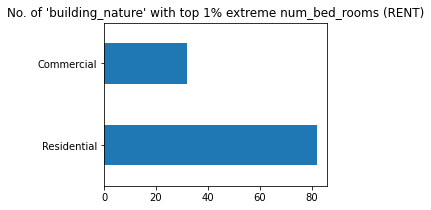

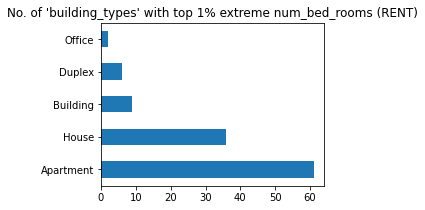

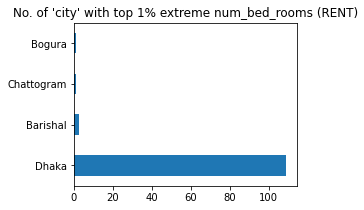

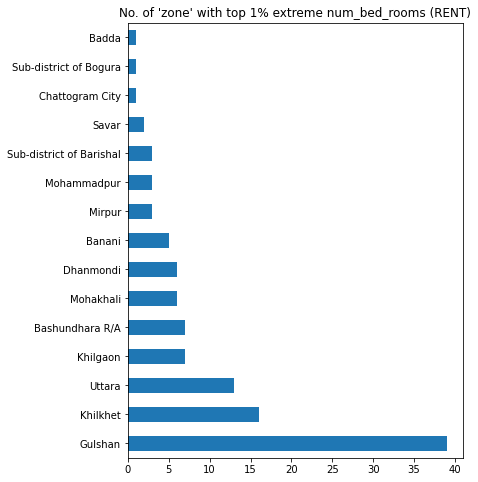

KeyError: 'site'

In [132]:
cut_off = bed_rent_perc['99%']

rent_df[rent_df.num_bed_rooms > cut_off]['building_nature'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_nature\' with top 1% extreme num_bed_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bed_rooms > cut_off]['building_type'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_types\' with top 1% extreme num_bed_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bed_rooms > cut_off]['city'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'city\' with top 1% extreme num_bed_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bed_rooms > cut_off]['zone'].value_counts().plot(kind = 'barh', figsize=(6,8))
plt.title("No. of \'zone\' with top 1% extreme num_bed_rooms (RENT)")
plt.show()

rent_df[rent_df.num_bed_rooms > cut_off]['site'].value_counts().plot(kind = 'barh', figsize=(6,3))
plt.title("No. of \'website\' with top 1% extreme num_bed_rooms (RENT)")
plt.show()



Exploring sale case

In [133]:
bed_sale_perc = sale_df.num_bed_rooms.describe(percentiles=[0.05, .25, .5, .75, 0.95, .99])
bed_sale_perc

count    12978.000000
mean         2.688242
std          2.222962
min          0.000000
5%           0.000000
25%          2.000000
50%          3.000000
75%          3.000000
95%          4.000000
99%          6.000000
max         94.000000
Name: num_bed_rooms, dtype: float64

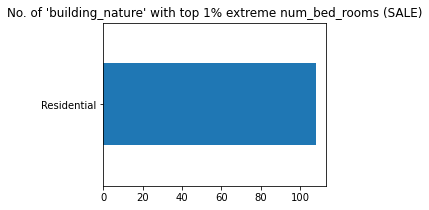

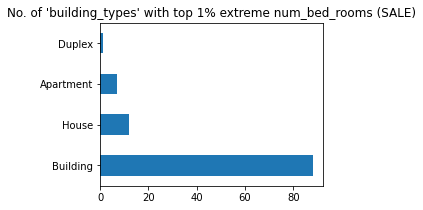

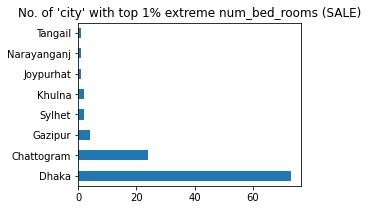

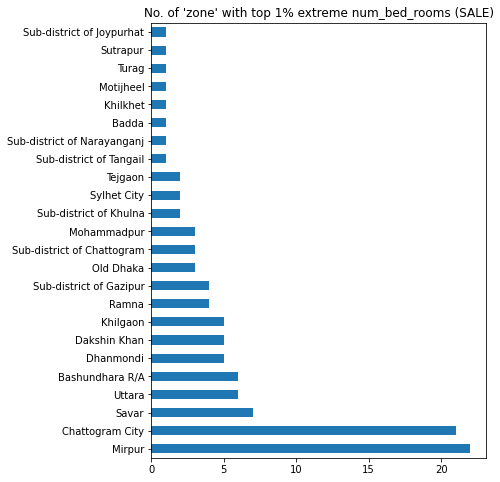

KeyError: 'site'

In [134]:
cut_off = bed_sale_perc['99%']

sale_df[sale_df.num_bed_rooms > cut_off]['building_nature'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_nature\' with top 1% extreme num_bed_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bed_rooms > cut_off]['building_type'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'building_types\' with top 1% extreme num_bed_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bed_rooms > cut_off]['city'].value_counts().plot(kind = 'barh', figsize=(4,3))
plt.title("No. of \'city\' with top 1% extreme num_bed_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bed_rooms > cut_off]['zone'].value_counts().plot(kind = 'barh', figsize=(6,8))
plt.title("No. of \'zone\' with top 1% extreme num_bed_rooms (SALE)")
plt.show()

sale_df[sale_df.num_bed_rooms > cut_off]['site'].value_counts().plot(kind = 'barh', figsize=(6,3))
plt.title("No. of \'website\' with top 1% extreme num_bed_rooms (SALE)")
plt.show()



1. **The 'Rent' properties with extreme 1% num_bath_room values (>5)** don't have anything peculiar about except for the fact that majority of them are in the `Gulshan` zone.

1. **The 'Sale' properties with extreme 1% num_bath_room values (>6)** are all of `Residential` 'building_nature' and majority of them are of `Building` type, which is not very surprising.

(**The summary for (ii) and (iii) is (_strangely_) almost identical. Moreover, there doesn't seem to be anything peculiar about the properties with extreme values for _num_bath_room_ and _num_bed_rooms_**)

<span id="properties-vs-divisions"></span>


[EDA](#eda)  
### 18. Distribution of properties per division 
We have found that our data repertition per city is highly imbalanced when we analysed the [distribution of properties per city](#properties-vs-cities). Now let's try to see how the data is distributed over division. Recall that the division group the cities based on how near they are from each other.      
This question was explored by Group 05.

In [109]:
# Number of properties per division
properties_per_division = df["division"].value_counts()
properties_per_division

Dhaka         29511
Chattogram     3499
Barisal         356
Rangpur         148
Rajshahi         66
Sylhet           58
Khulna           49
Mymensingh       11
Name: division, dtype: int64

Let's plot the result in order to read it better.

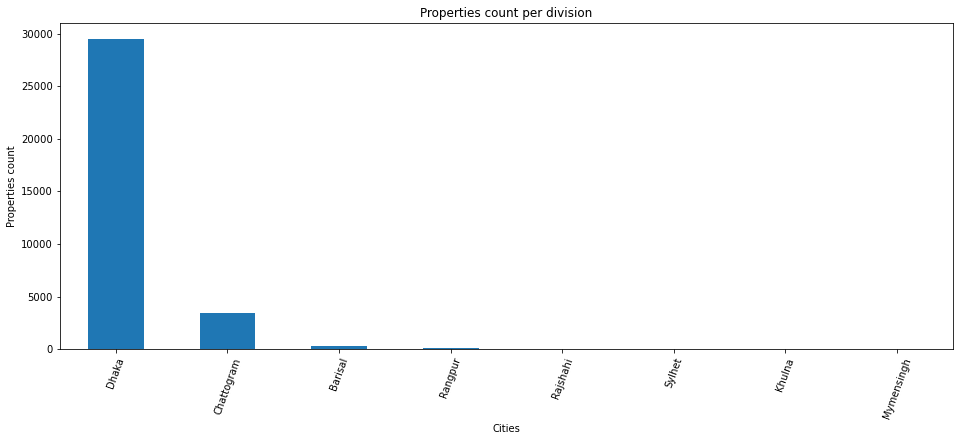

In [124]:
# Plotting properties count per division
properties_per_division.plot(kind="bar", figsize=(16,6))

plt.xticks(rotation=70)

plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per division");

<span id="properties-vs-divisions-interpretation"></span>

1. Most of our properties are in `Dhaka` division, for a total of nearly 30,000 properties. We also have nearly 4000 properties in the division of `Chattogram`.     
1. Other divisions have a negligible amount of properties.


<br/>

❗ **Recommendation**:
* We should only consider cities in `Dhaka` and `Chattogram` divisions when building our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<div id="conclusion"></div>

[TOC](#intro)  
## Conclusions

* The distribution of properties in our dataset is imbalanced: most of them are in `Dhaka` and `Chattogram` divisions.

* Nearly 80% of our properties are `Apartment`, for a total of nearly 27000 samples. We also have some `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`, whose number are under 10% of the total dataset

* 81% of our properties are `Residential`, while the rest are `Commercial`.

* In residential properties, we usually found 01 expendable amenity and 01 maintenance/cleaning amenity. In commercial properties, we usually found 01 expendable amenity, 01 maintenance/cleaning amenity, and 01 security amenity.


We found many factors impacting the prices:
* the properties types (shop, apartment, ...) and the properties natures (residential, commercial), as well as their purpose (rent/sale)
* the (number of) amenities in the vicinities, as well as their nature (security, social, expendable, ...), impact the prices.

Surprisingly, the area of properties don't have a (linear) relationship with the properties prices, either for rent or sale. Nearly all cities have very high density, however there is no (linear) relationship between the properties density and the prices.


When doing the work, we encountered some limitations:
* We wanted to understand how facilities in the vicinity, such malls or educational institutions, can impact the prices. However the collected data didn't allow us to explore that question.

Here are the summarized recommendations:
* The data is imbalanced between the properties types. We should drop sample which properties types are not either of: `Apartment`, `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`.
* We should drop the amenities types where nearly all datas are the same: relaxation, service staff, social
* We should consider removing service staff amenities count column, since it doesn't impact the prices that much
*  We should only consider cities in `Dhaka` and `Chattogram` divisions/cities when building our future models, since they hold 90% of our data.

